# Final Project Python S7: Spambase Dataset

Chloé DEPERTHES, Victoria GAUTHIER, Rémi KALBE

## Beforehand

#### Imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pylab import rcParams

#### Naming columns

The name of each column is defined in a separated file named `spambase.names`, from this file we are going to extract the column names. We also noticed that it was missing the last column which defines if it was spam or not, so we manually added it at the end.

In [2]:
with open('./dataset/spambase.names') as f:
    namesFile = f.readlines()

names = []
for line in namesFile:
    if not line.startswith("|") and not line.startswith("1") and len(line) > 1:
        names.append(line.split(":")[0])

names.append("is_spam")
names

['word_freq_make',
 'word_freq_address',
 'word_freq_all',
 'word_freq_3d',
 'word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_mail',
 'word_freq_receive',
 'word_freq_will',
 'word_freq_people',
 'word_freq_report',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_email',
 'word_freq_you',
 'word_freq_credit',
 'word_freq_your',
 'word_freq_font',
 'word_freq_000',
 'word_freq_money',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_650',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_telnet',
 'word_freq_857',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_technology',
 'word_freq_1999',
 'word_freq_parts',
 'word_freq_pm',
 'word_freq_direct',
 'word_freq_cs',
 'word_freq_meeting',
 'word_freq_original',
 'word_freq_project',
 'word_freq_re',
 'word_freq_edu',
 'word_freq_table',
 'word_freq_conference',
 'char_freq_;',
 'char_freq_(',
 'char_freq_[',
 '

#### Load dataset

In [3]:
df = pd.read_csv("./dataset/spambase.data")
df.columns = names
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


## Data preparation

#### Cleaning columns

In [4]:
s = df.nunique()
sorted_series = s.sort_values(ascending
                              = True)
sorted_series
# Looking for useless constant columns in the dataset to take out.

is_spam                          2
word_freq_table                 38
word_freq_3d                    43
word_freq_parts                 53
word_freq_font                  99
word_freq_conference           106
word_freq_857                  106
word_freq_cs                   108
word_freq_415                  110
word_freq_receive              113
word_freq_addresses            118
word_freq_direct               125
word_freq_telnet               128
word_freq_report               133
word_freq_original             136
word_freq_over                 141
word_freq_make                 142
word_freq_money                143
word_freq_order                144
word_freq_credit               148
word_freq_lab                  156
word_freq_people               158
word_freq_technology           159
word_freq_project              160
word_freq_pm                   163
word_freq_000                  164
word_freq_internet             170
word_freq_address              171
word_freq_remove    

There are no constant columns: at least two different values are taken in each column so they all may still influence the y response.

In [5]:
df = df.apply(pd.to_numeric)
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)].astype(np.float64)
# Making sure we only have float numerics

/var/folders/0d/tjsflkhd1r73y_gm7h02b32h0000gn/T/ipykernel_93242/2152024697.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)].astype(np.float64)


#### Data info: 

In [6]:
print('there are ', df.shape[0], 'rows for ', df.shape[1], 'columns')

there are  4600 rows for  58 columns



##### 
    
    count : Total number of entries
    unique : Total number of unique entries
    top : Most frequent entry
    freq : Frequency of the most frequent entry

In [7]:
stats = df.describe(include = 'all')
print(stats)
print(stats.iloc[0].isnull().nunique())

       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4600.000000        4600.000000    4600.000000   4600.000000   
mean         0.104576           0.212922       0.280578      0.065439   
std          0.305387           1.290700       0.504170      1.395303   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4600.000000     4600.000000       4600.000000         4600.000000   
mean        0.312222        0.095922          0.114233            0.105317   
std         0.672586        0.273850          0.391480            0.401112   
min         0.000000        0.

There are therefore no null values.

## Data visualization

### Raw Data : Spam and not spam (Class column)

How many of the dataset's e-mails are spam? How many are not?

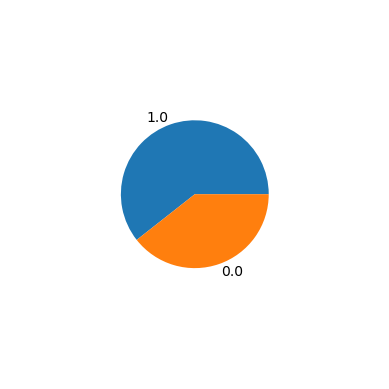

0.0    2788
1.0    1812
Name: is_spam, dtype: int64


In [8]:
#pie data
label= df["is_spam"].unique()
data = df["is_spam"].value_counts() 

# Creating plot
fig = plt.figure()
plt.pie(data, labels = label, radius = 0.5)

# show plot
plt.show()
print(data)


### Visualization of the link between data and target

#### Raw explanatory variable column data / raw Class column data

For `word_freq_internet`: Graph of the `is_spam` feature in function of the values taken by the column with the frequence of the word 'internet'.

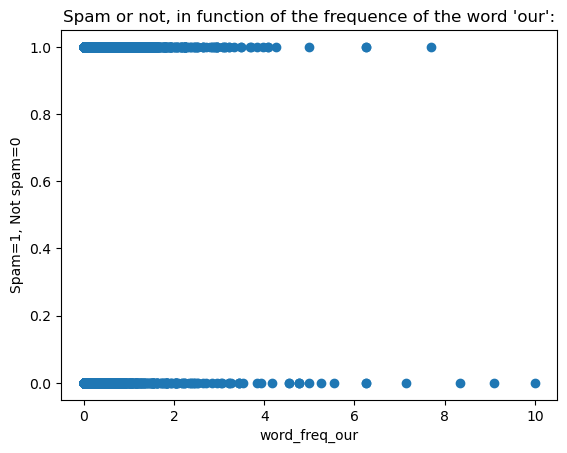

In [9]:
plt.scatter(df['word_freq_our'],df['is_spam'])
plt.title("Spam or not, in function of the frequence of the word 'our':")
plt.xlabel('word_freq_our')
plt.ylabel("Spam=1, Not spam=0")
plt.show()

The link between the variables and the spam/not spam characteristic is not clear.
The data needs to be binned by average.

#### Binning / Bucketing + Aggregation

In [10]:
from warnings import filterwarnings
# for the presentation:
filterwarnings('ignore')
import numpy as np

n = 10
tab=[]
loopliste = [cl for cl in df.columns.values if cl != 'is_spam']

for k in loopliste: 
    print('\n', 'With', k)
    
    adf = df[[k, 'is_spam']]
    amax = np.max(adf[k])                       # Get max of all array values
    amin = np.min(adf[k])                       # Get min of all array values
    atot = amax-amin # this distance covers all of the values.
    afintot = atot/n  # this is the size of the bins (we want n = 10 of them)
    print('min', amin, 'max', amax, 'distance', atot, 'step', afintot)
    
    # creating the n=10 bins, starting at bmin, ending at bmax.
    bins = []
    for i in range(n+1):
        bins.append(amin + (i*afintot)) 
    
    # avec y étant la colonne avec les 0 et les 1 qu'on veut pouvoir prédire
    
    a = adf[k]
    a = np.array(list(a))

    a_bins = adf.groupby(pd.cut(a.flatten(), bins))
    a_bins = a_bins.agg([np.mean])
    a_bins = a_bins.dropna()
    
    
    print('\n', a_bins, '\n')
    
    #Stocker ces bins et leurs valeurs dans un tab, indexé par colonne du DF 'df'
    tab.append(a_bins)
    


 With word_freq_make
min 0.0 max 4.54 distance 4.54 step 0.454

                word_freq_make   is_spam
                         mean      mean
(0.0, 0.454]         0.204807  0.593472
(0.454, 0.908]       0.638075  0.705660
(0.908, 1.362]       1.097183  0.563380
(1.362, 1.816]       1.547143  0.571429
(1.816, 2.27]        2.036000  0.066667
(2.27, 2.724]        2.348000  0.800000
(2.724, 3.178]       2.855000  0.000000
(3.632, 4.086]       3.926667  0.000000
(4.086, 4.54]        4.440000  0.500000 


 With word_freq_address
min 0.0 max 14.28 distance 14.28 step 1.428

                 word_freq_address   is_spam
                             mean      mean
(0.0, 1.428]             0.410733  0.747826
(1.428, 2.856]           1.934651  0.441860
(2.856, 4.284]           3.521250  0.125000
(4.284, 5.712]           4.923333  0.666667
(5.712, 7.14]            6.675000  0.000000
(8.568, 9.996]           9.520000  0.000000
(12.852, 14.28]         14.280000  0.000000 


 With word_freq_all
mi

We, therefore, have a table called 'tab' that contains all of the variable buckets, with the average variables inside + the average of the classification features of these contained variables.

For example, I want to see this for Variable 5, column 4:

In [11]:
tab[4]

,word_freq_our,is_spam
,mean,mean
"(0.0, 1.0]",0.443780,0.627559
"(1.0, 2.0]",1.365112,0.748603
"(2.0, 3.0]",2.385616,0.657534
"(3.0, 4.0]",3.407083,0.541667
"(4.0, 5.0]",4.539091,0.363636
"(5.0, 6.0]",5.405000,0.000000
"(6.0, 7.0]",6.250000,0.500000
"(7.0, 8.0]",7.415000,0.500000
"(8.0, 9.0]",8.330000,0.000000


#### Scatter Plotting with the buckets and the column averages

What about it ? This will allow a global comprehension, as we will  do the same as previously, except this time we will have a more generalized vision of the data.
This is crucial for data selection

1


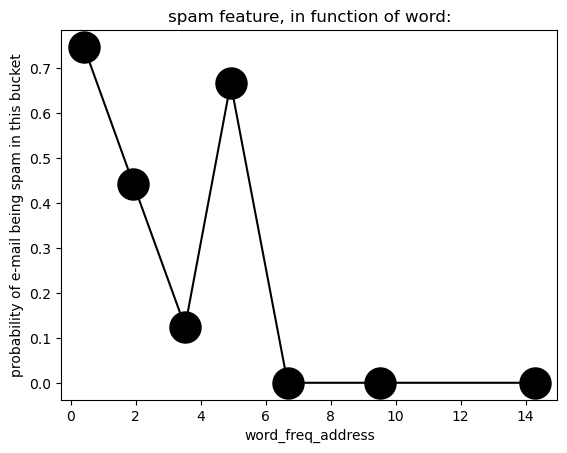

<Figure size 100x100 with 0 Axes>

2


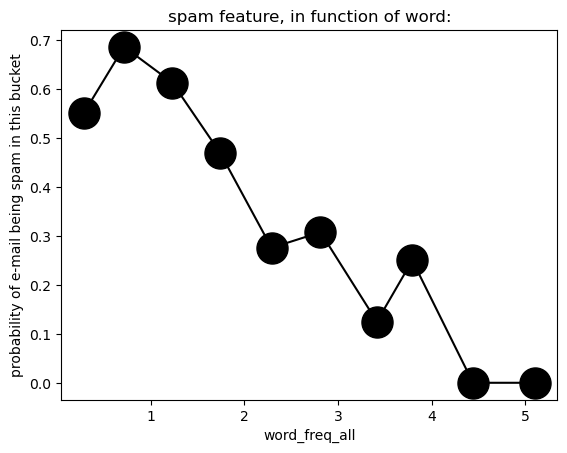

<Figure size 100x100 with 0 Axes>

3


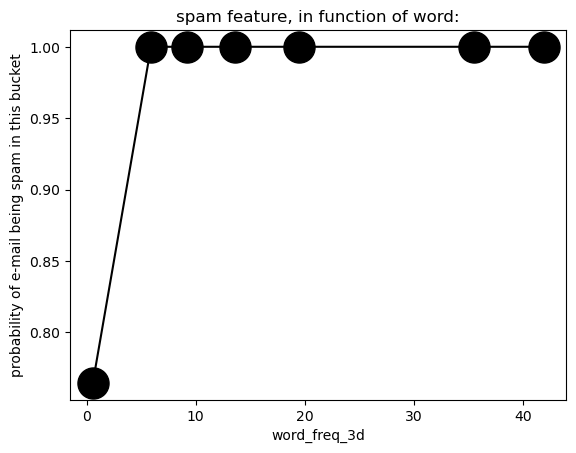

<Figure size 100x100 with 0 Axes>

4


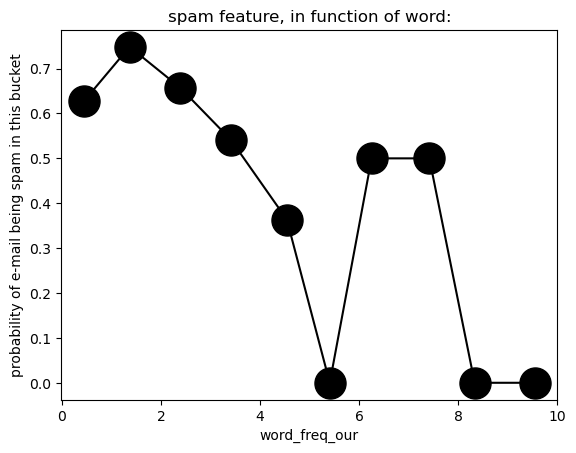

<Figure size 100x100 with 0 Axes>

5


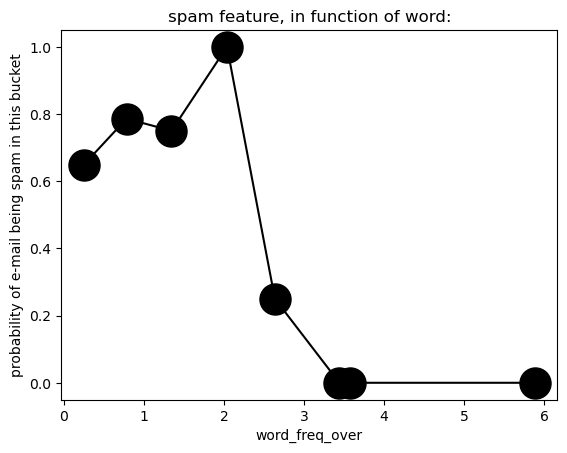

<Figure size 100x100 with 0 Axes>

6


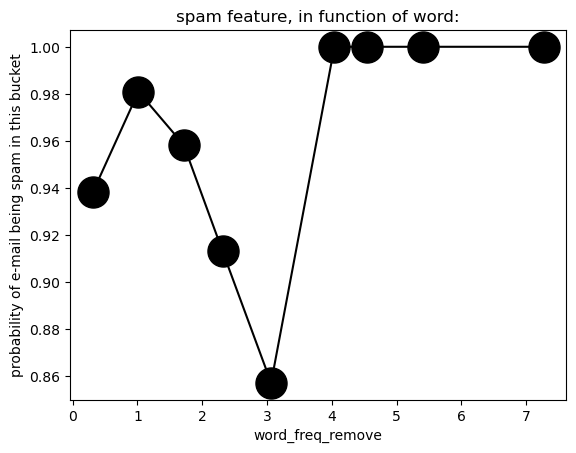

<Figure size 100x100 with 0 Axes>

7


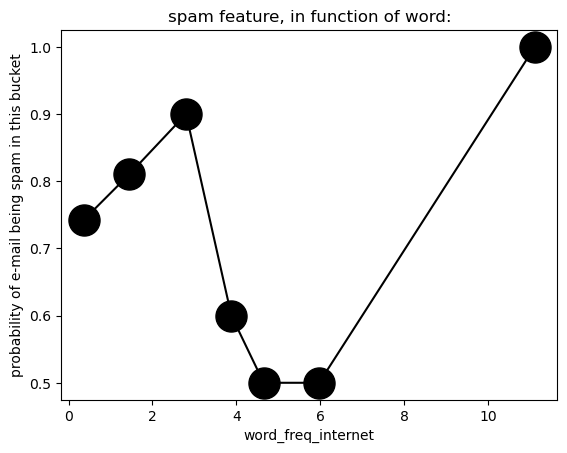

<Figure size 100x100 with 0 Axes>

8


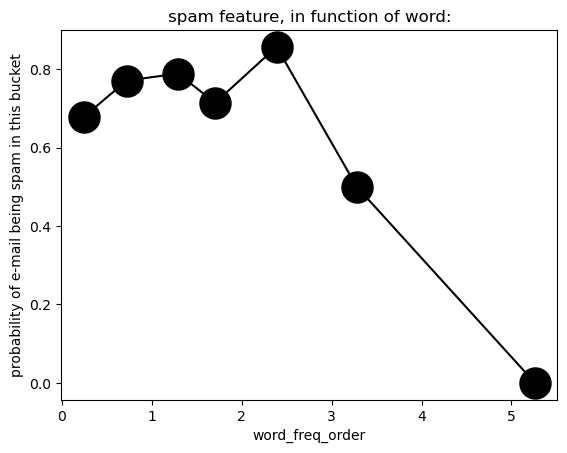

<Figure size 100x100 with 0 Axes>

9


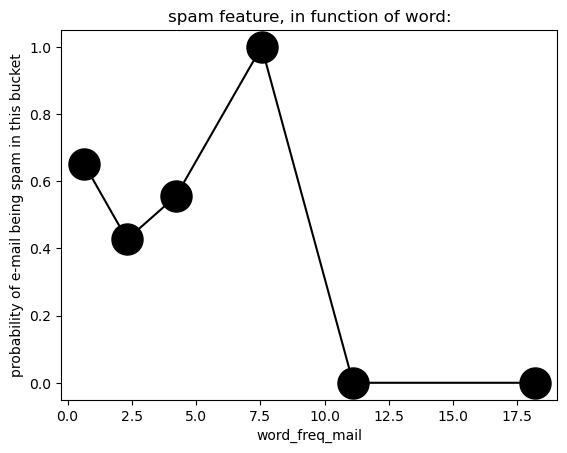

<Figure size 100x100 with 0 Axes>

10


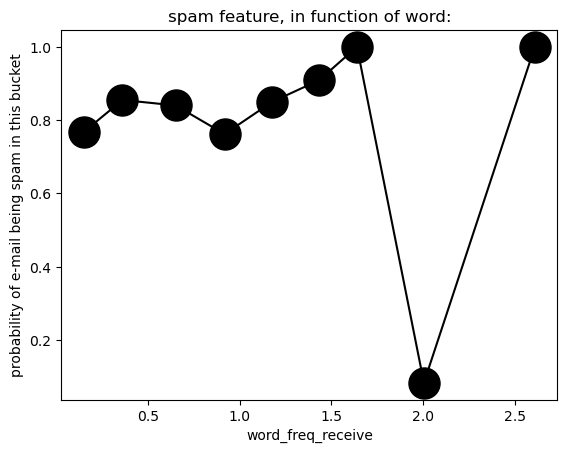

<Figure size 100x100 with 0 Axes>

11


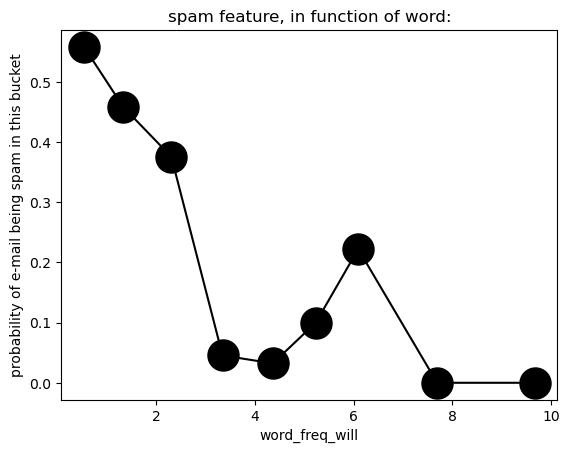

<Figure size 100x100 with 0 Axes>

12


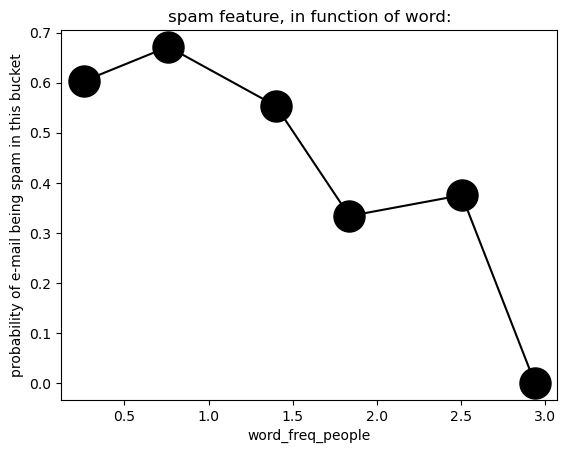

<Figure size 100x100 with 0 Axes>

13


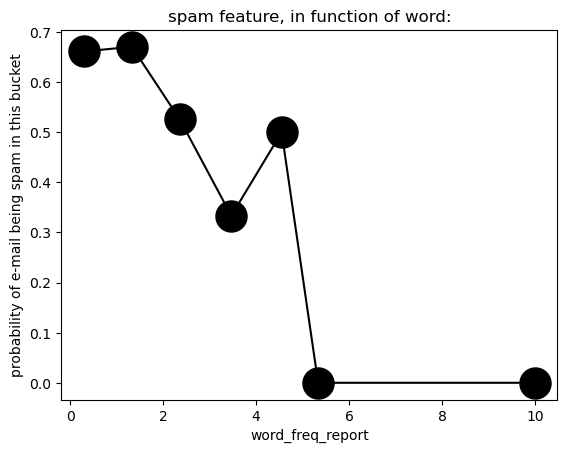

<Figure size 100x100 with 0 Axes>

14


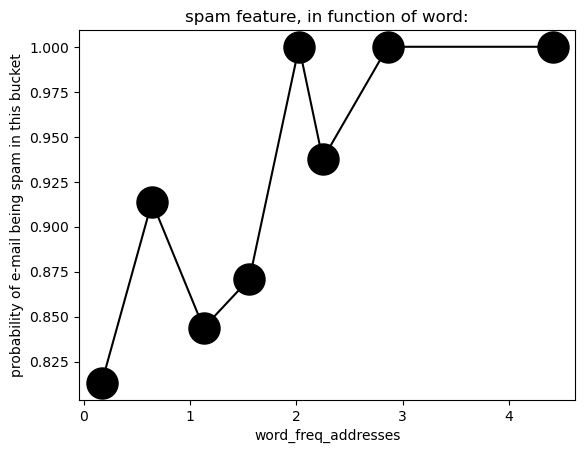

<Figure size 100x100 with 0 Axes>

15


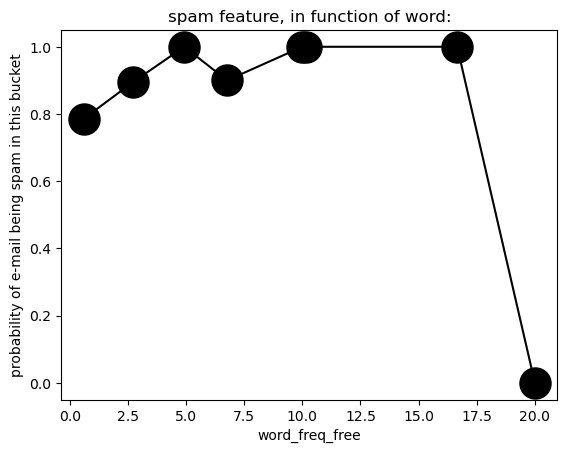

<Figure size 100x100 with 0 Axes>

16


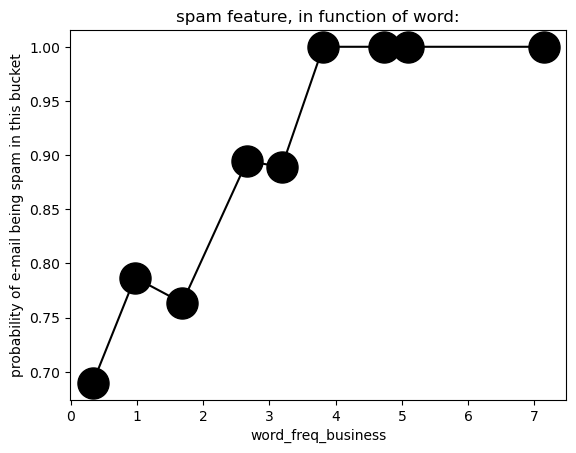

<Figure size 100x100 with 0 Axes>

17


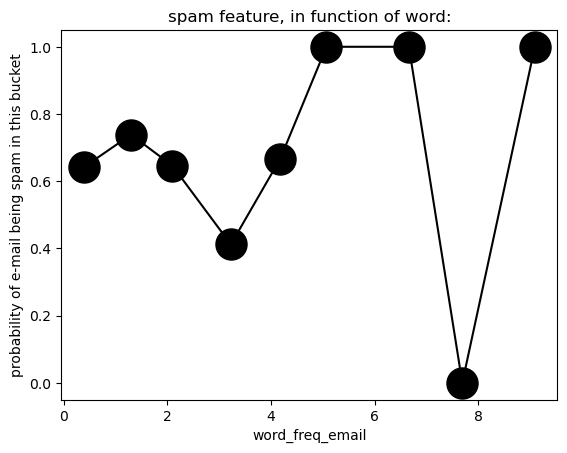

<Figure size 100x100 with 0 Axes>

18


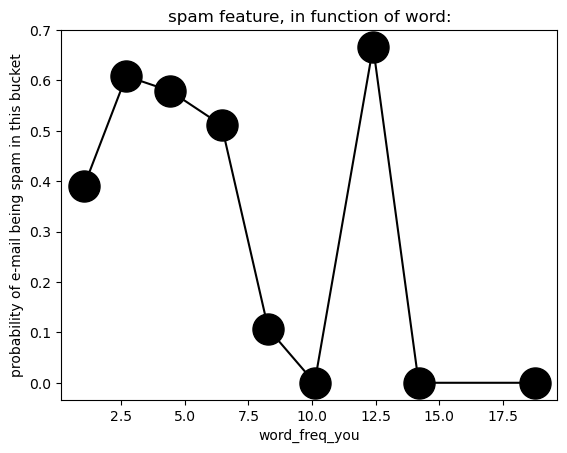

<Figure size 100x100 with 0 Axes>

19


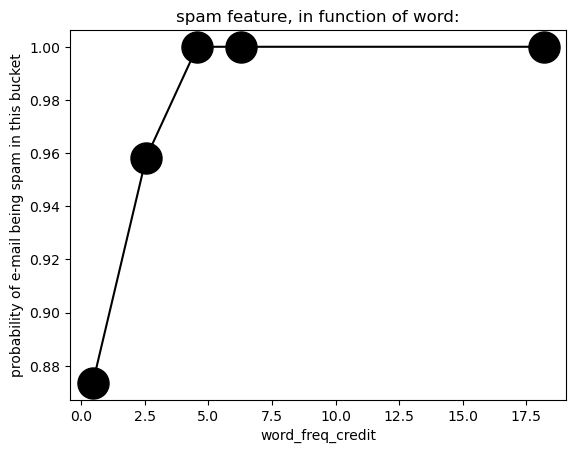

<Figure size 100x100 with 0 Axes>

20


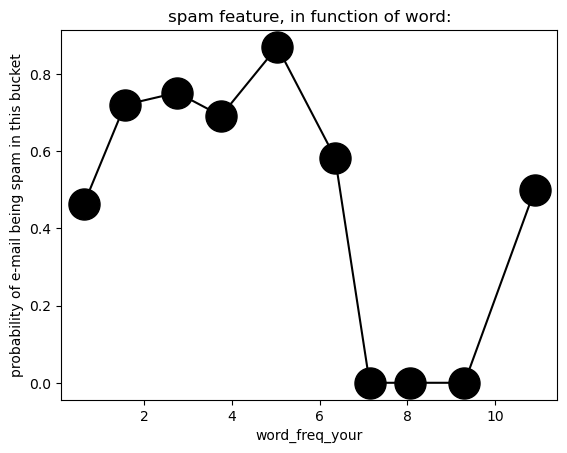

<Figure size 100x100 with 0 Axes>

21


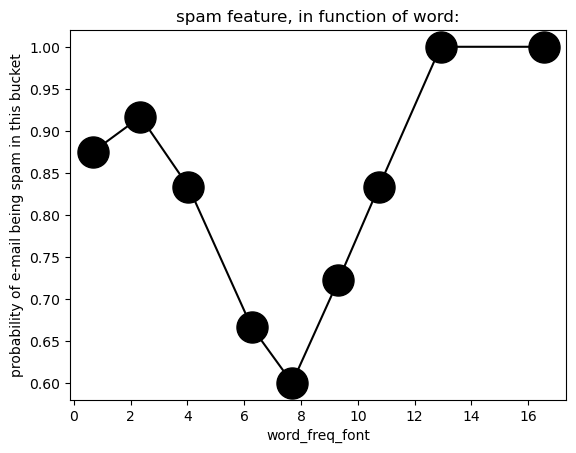

<Figure size 100x100 with 0 Axes>

22


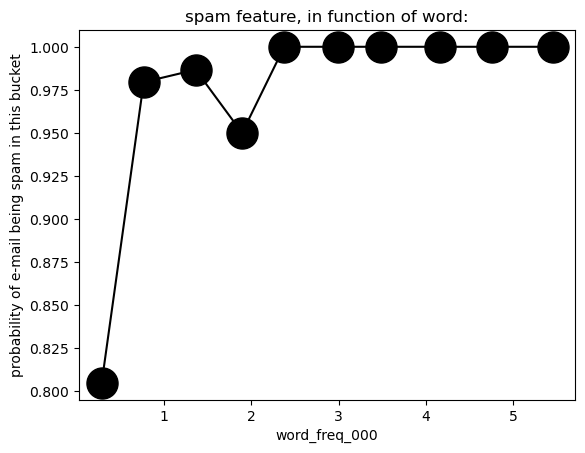

<Figure size 100x100 with 0 Axes>

23


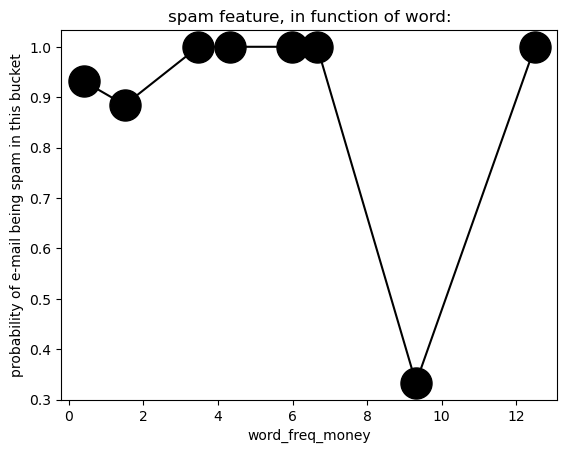

<Figure size 100x100 with 0 Axes>

24


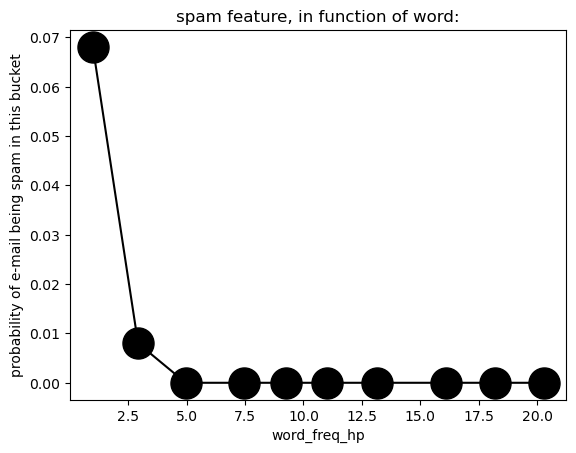

<Figure size 100x100 with 0 Axes>

25


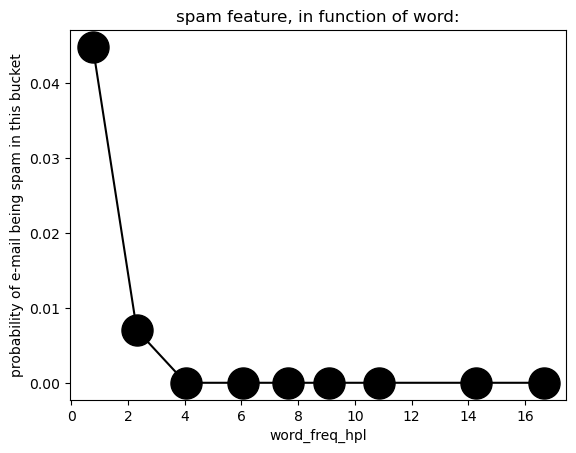

<Figure size 100x100 with 0 Axes>

26


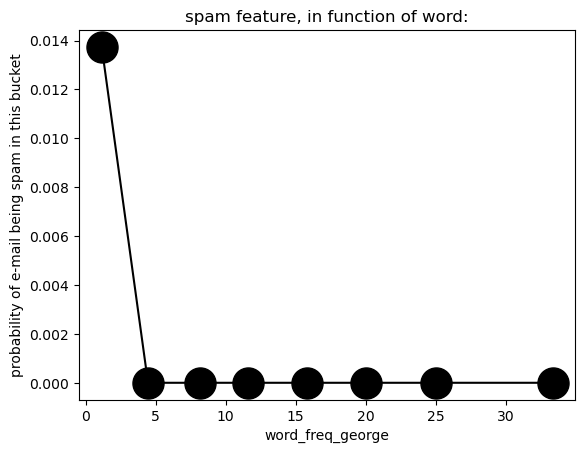

<Figure size 100x100 with 0 Axes>

27


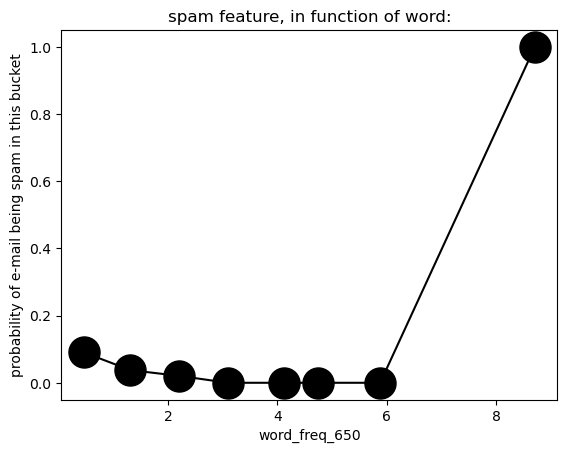

<Figure size 100x100 with 0 Axes>

28


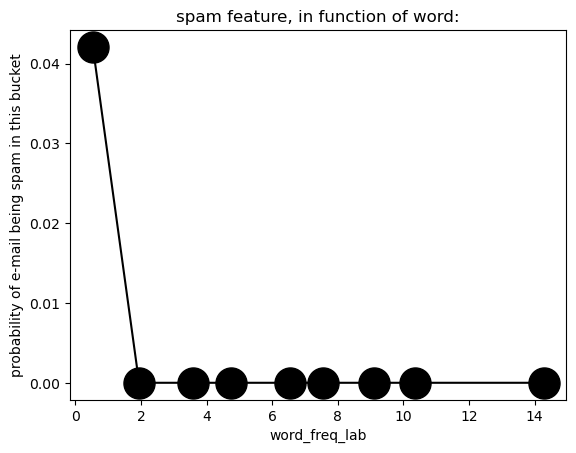

<Figure size 100x100 with 0 Axes>

29


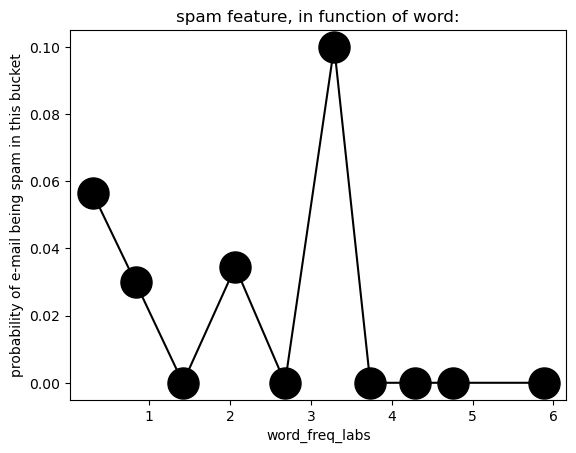

<Figure size 100x100 with 0 Axes>

30


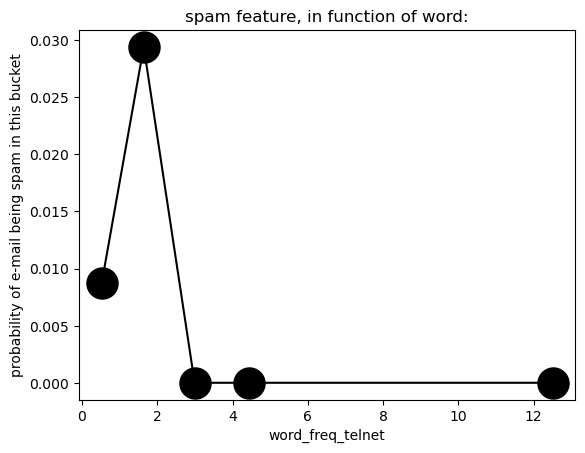

<Figure size 100x100 with 0 Axes>

31


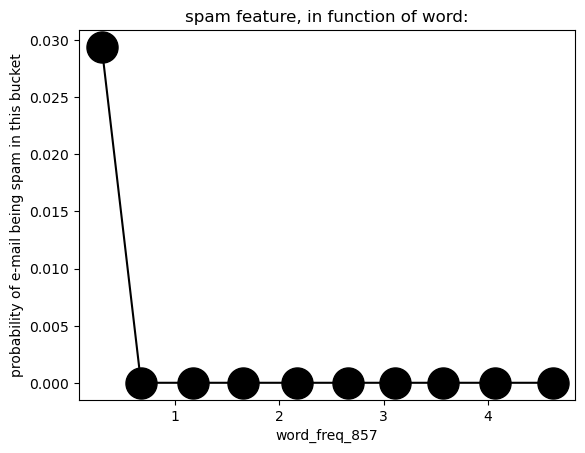

<Figure size 100x100 with 0 Axes>

32


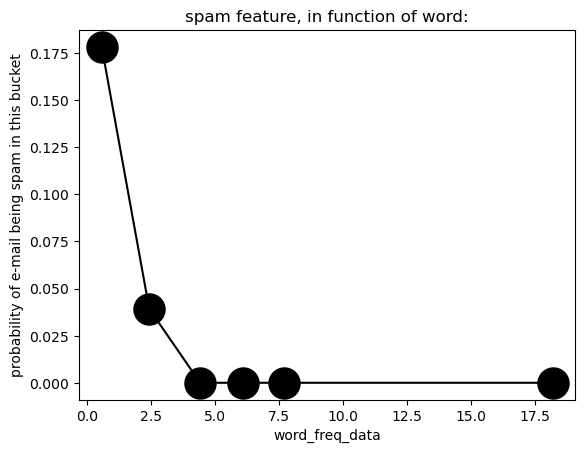

<Figure size 100x100 with 0 Axes>

33


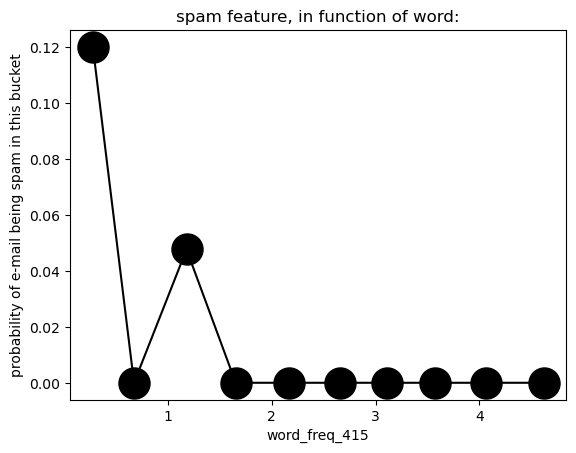

<Figure size 100x100 with 0 Axes>

34


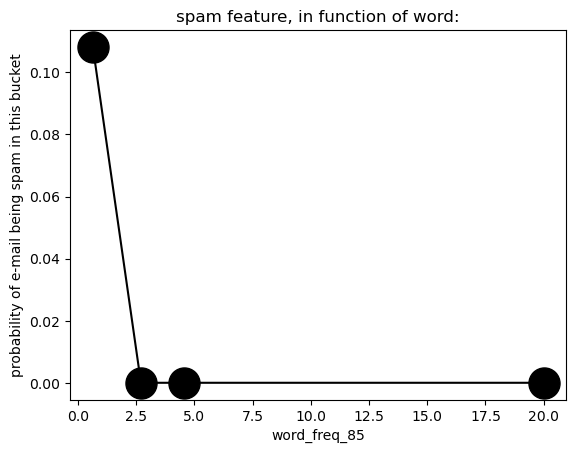

<Figure size 100x100 with 0 Axes>

35


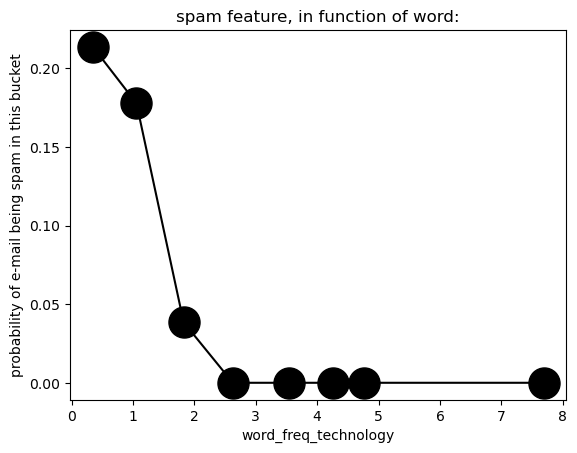

<Figure size 100x100 with 0 Axes>

36


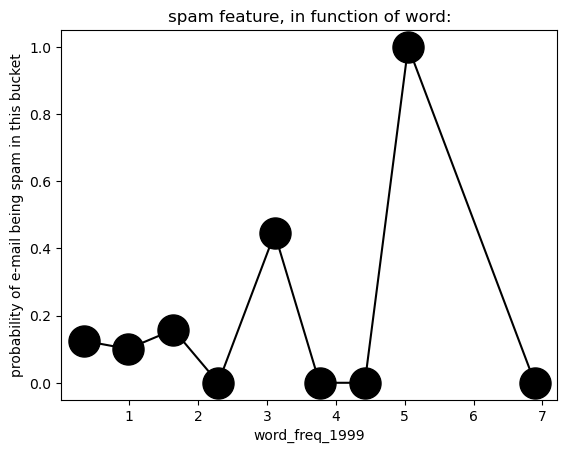

<Figure size 100x100 with 0 Axes>

37


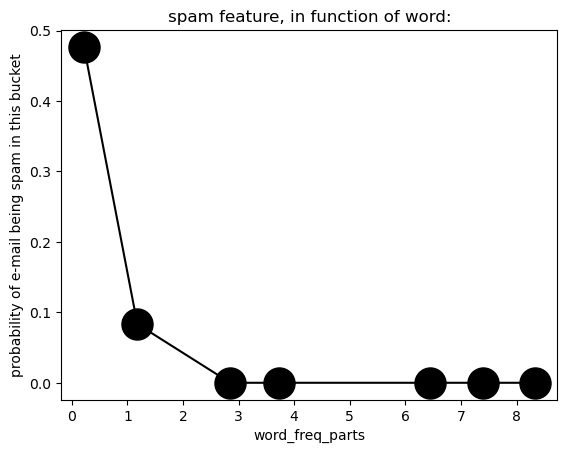

<Figure size 100x100 with 0 Axes>

38


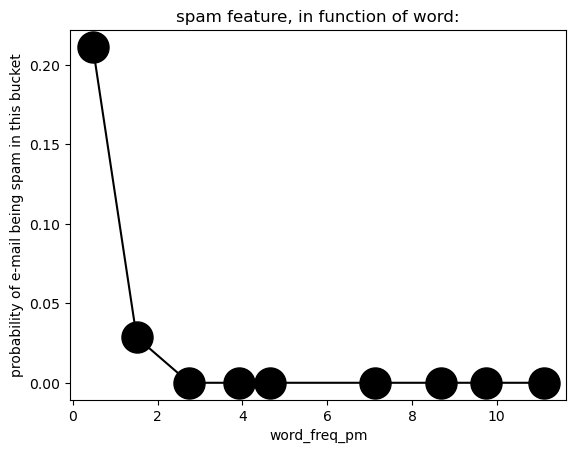

<Figure size 100x100 with 0 Axes>

39


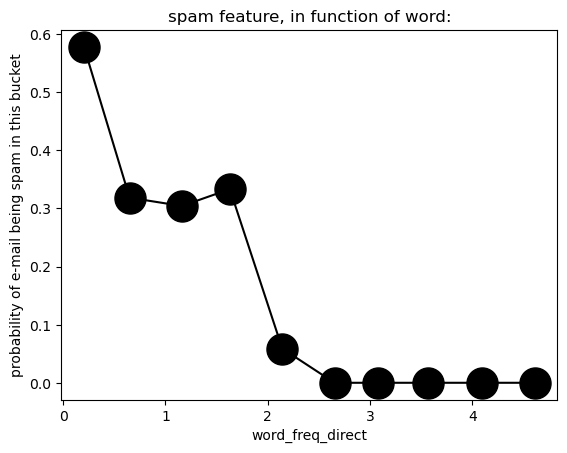

<Figure size 100x100 with 0 Axes>

40


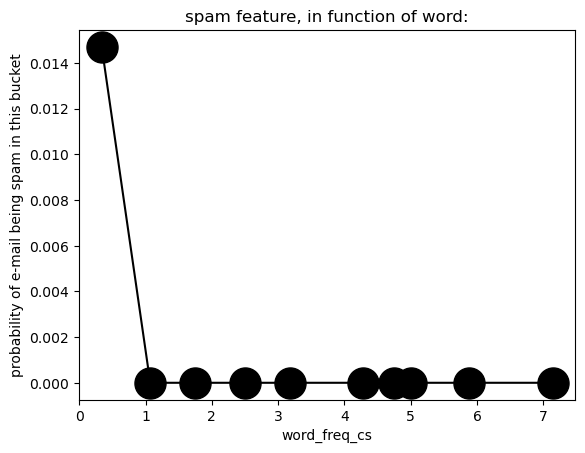

<Figure size 100x100 with 0 Axes>

41


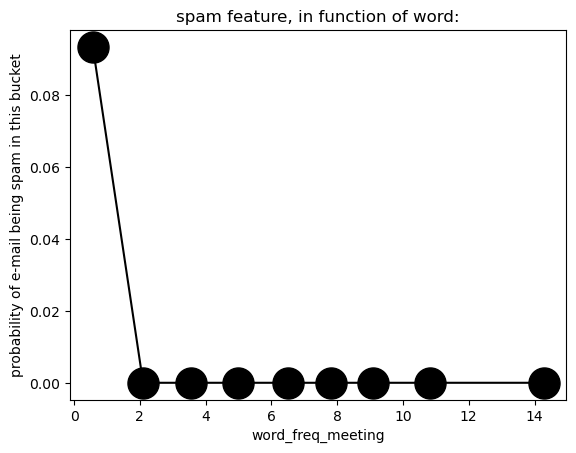

<Figure size 100x100 with 0 Axes>

42


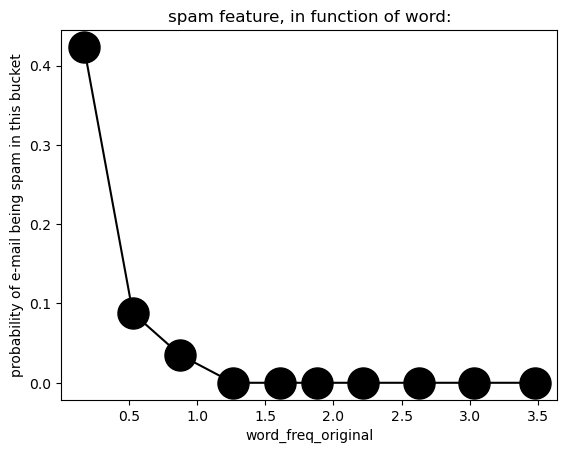

<Figure size 100x100 with 0 Axes>

43


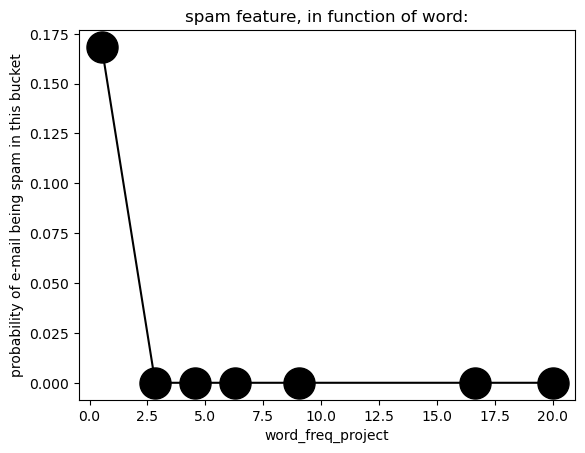

<Figure size 100x100 with 0 Axes>

44


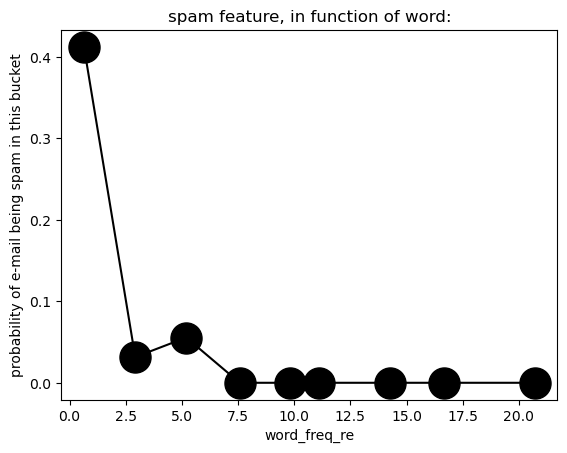

<Figure size 100x100 with 0 Axes>

45


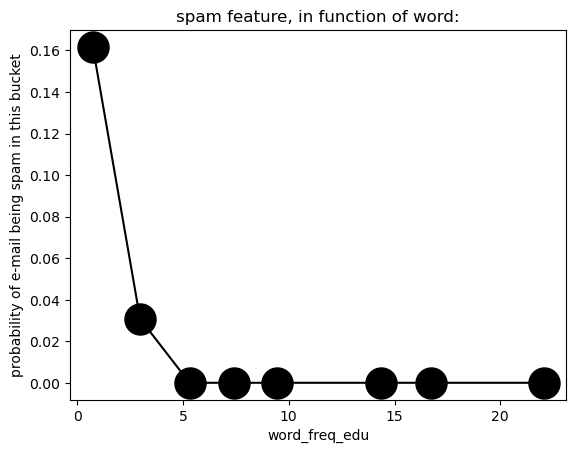

<Figure size 100x100 with 0 Axes>

46


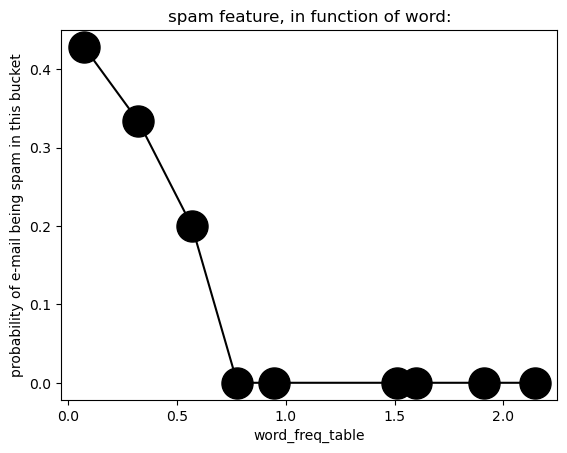

<Figure size 100x100 with 0 Axes>

47


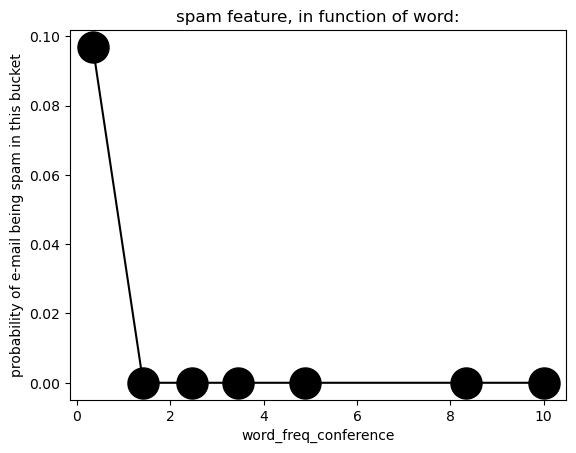

<Figure size 100x100 with 0 Axes>

48


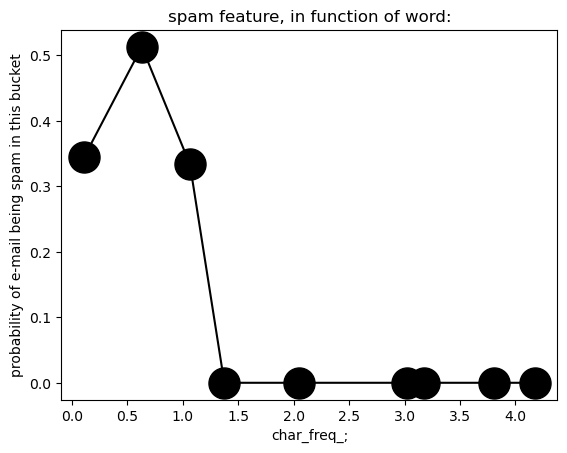

<Figure size 100x100 with 0 Axes>

49


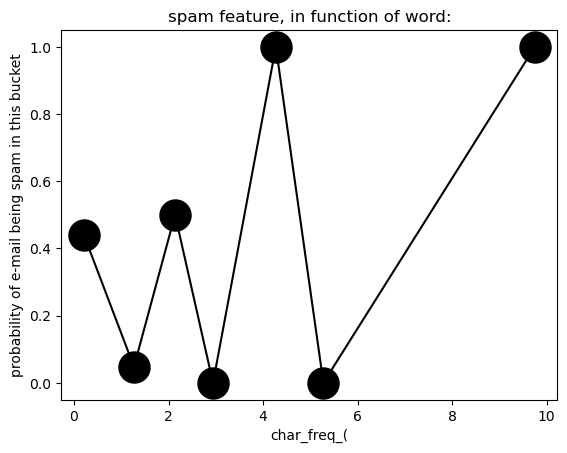

<Figure size 100x100 with 0 Axes>

50


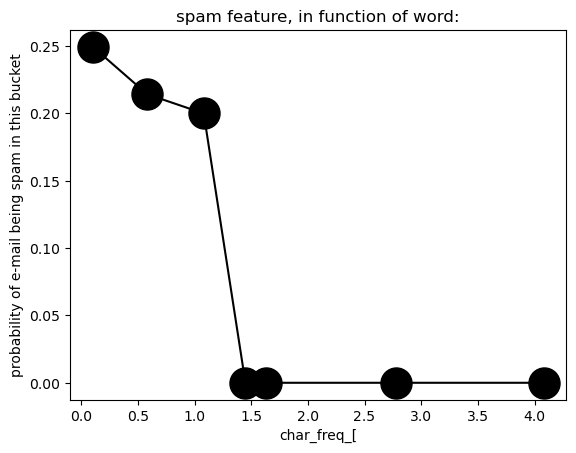

<Figure size 100x100 with 0 Axes>

51


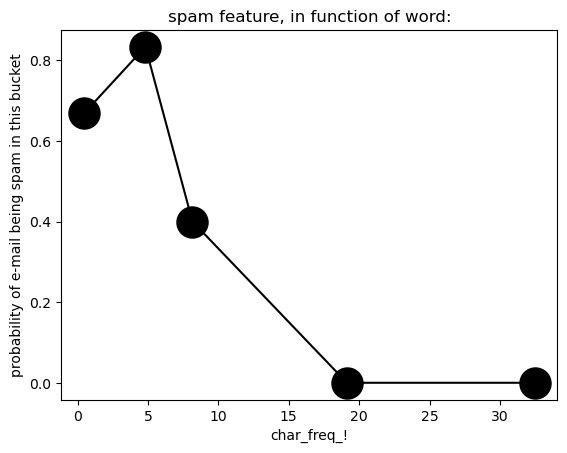

<Figure size 100x100 with 0 Axes>

52


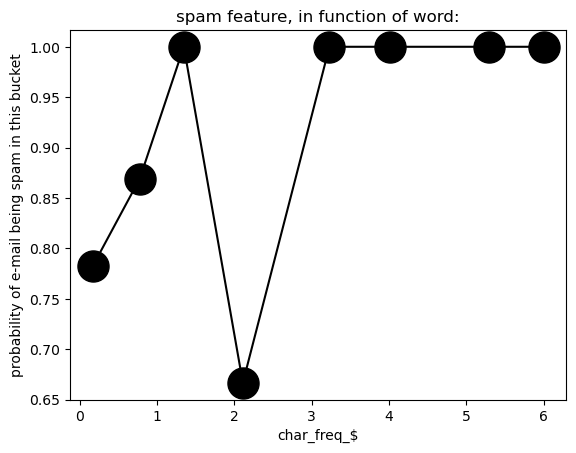

<Figure size 100x100 with 0 Axes>

53


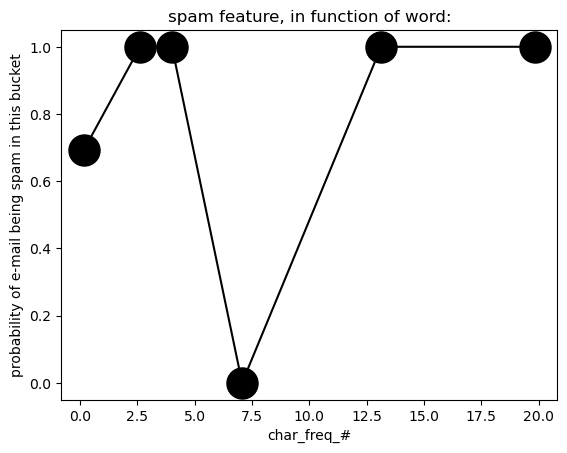

<Figure size 100x100 with 0 Axes>

54


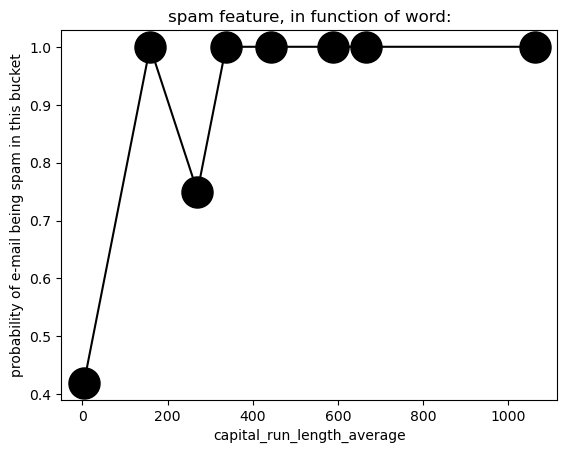

<Figure size 100x100 with 0 Axes>

55


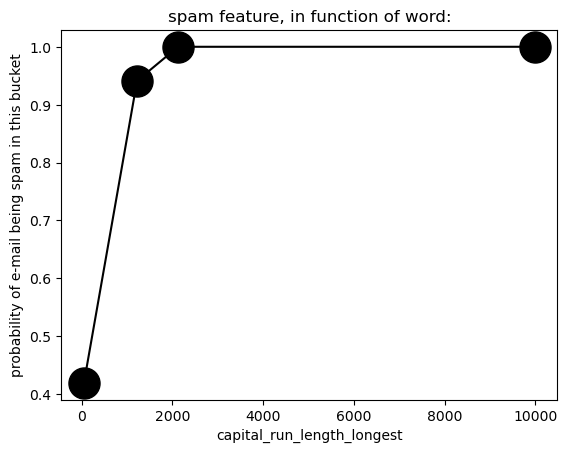

<Figure size 100x100 with 0 Axes>

56


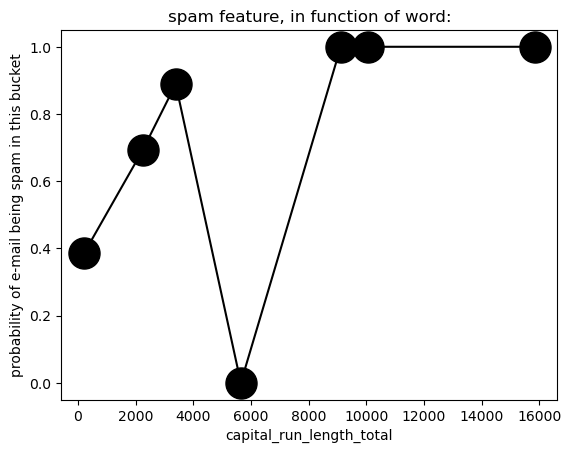

<Figure size 100x100 with 0 Axes>

In [12]:
for n in range(1, len(list(df.columns.values))-1):
    print(n)
    _names = list(tab[n].columns.values)
    var = _names[0][0]
    cla = _names[1][0]
    truc = tab[n]
    plt.scatter(truc[var],truc[cla], s=500, color="black")
    plt.plot(np.array(truc[var]),np.array(truc[cla]), color="black")
    plt.title("spam feature, in function of word:")
    plt.xlabel(names[n])
    plt.ylabel("probability of e-mail being spam in this bucket")
    f = plt.figure()
    f.set_figwidth(1)
    f.set_figheight(1)
    plt.show()
    

By looking at these graphs, we may conjecture on the important variables in this study.

#### Does the average of the explanatory values change, when grouped by spam/not spam ?

In [13]:
# colormap creation
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm

N = 40 # number of lines
x = np.array([0, 1])
theta = np.linspace(0, np.pi / 2, N)

discr = np.linspace(0, 1, N)
# create N colors from the colormap
colors = cm.hsv(discr)

In [14]:
df_mean = df.groupby(["is_spam"]).mean().drop(["capital_run_length_average", "capital_run_length_longest", "capital_run_length_total"], axis=1)
a = df_mean.transpose()
a = round(a,2)
a

is_spam,0.0,1.0
word_freq_make,0.07,0.15
word_freq_address,0.24,0.16
word_freq_all,0.20,0.40
word_freq_3d,0.00,0.16
word_freq_our,0.18,0.51
word_freq_over,0.04,0.17
word_freq_remove,0.01,0.28
word_freq_internet,0.04,0.21
word_freq_order,0.04,0.17
word_freq_mail,0.17,0.35


In [15]:
simp = a[(a[1.0]-a[0.0])>0.3]
simp.sort_values(by=1, ascending=False)

is_spam,0.0,1.0
word_freq_you,1.27,2.26
word_freq_your,0.44,1.38
word_freq_free,0.07,0.52
word_freq_our,0.18,0.51
char_freq_!,0.11,0.51


In the case where an email is considered spam, we tend to observe a greater occurrence of 'our', 'free', 'you, 'your', and '!'. As seen below:

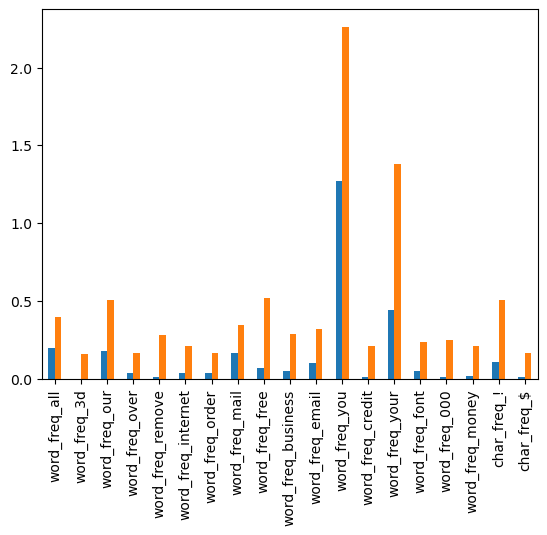

<Figure size 600x600 with 0 Axes>

In [16]:
b = a[(a[1.0]-a[0.0])>0.1]
b.plot.bar(legend=None)
plt.figure(figsize=(2, 2), dpi=300)
rcParams['figure.figsize'] = 50, 20

#### Correlations heatmap

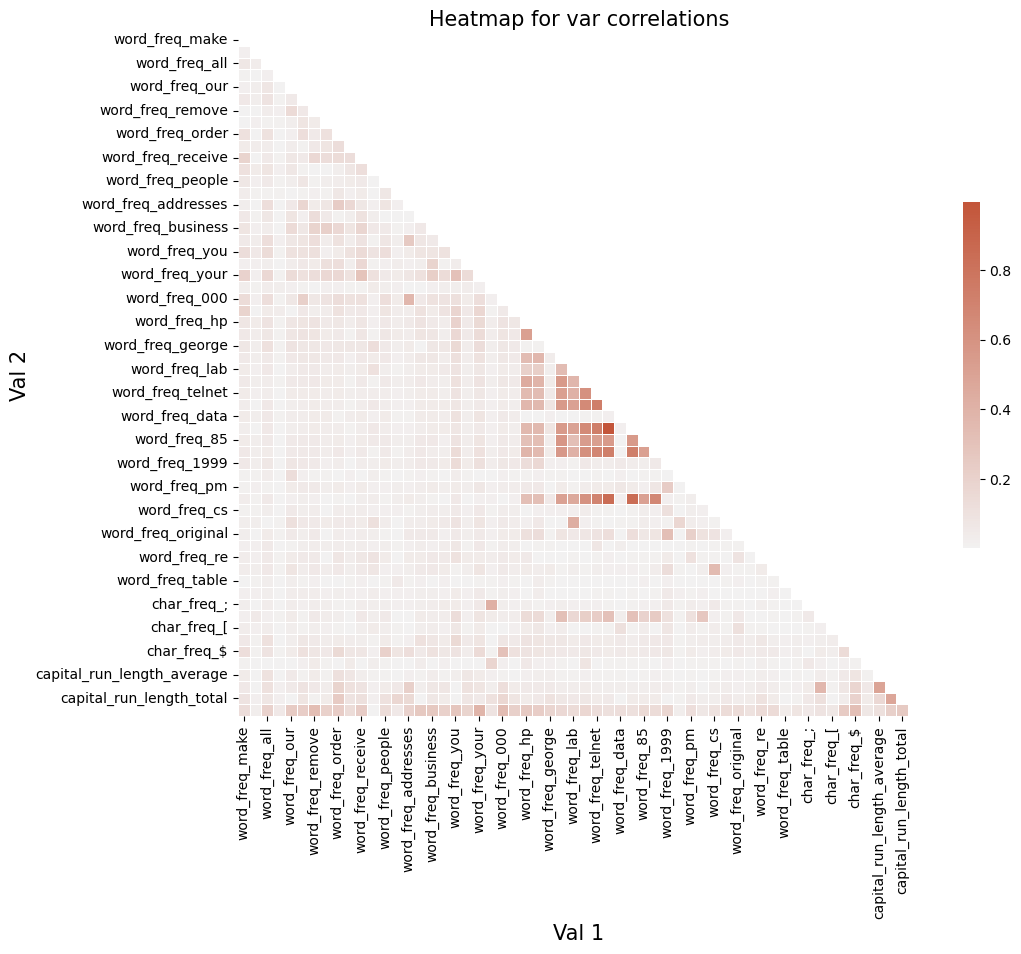

In [17]:
corr = df.corr().abs()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Heatmap for var correlations', fontsize = 15) 
plt.xlabel('Val 1', fontsize = 15) 
plt.ylabel('Val 2', fontsize = 15) 
plt.show()

This allows us to visualize the overfitting of the data by our current variables and therefore suggests that we reduce the number of variables. We will proceed to do so in the following part, in which our method of choice is data dimensionality reduction by Principal Component Analysis. This allows us to be more precise than we have previously been for visualization purposes.

To keep score of the accuracy of the models we will be using we will be updating a DataFrame called 'accur', which will store accuracies of different models.

In [18]:
accur = pd.DataFrame()

#### Principal Component Analysis for reducing dimensionality of data

Creation of : Observation data (predictor value) DataFrame X / Target data (response value) Series Y

In [19]:
X = df.loc[:, df.columns != "is_spam"] #explanatory
y = df["is_spam"] #target

Text(0, 0.5, 'Second Principal Component')

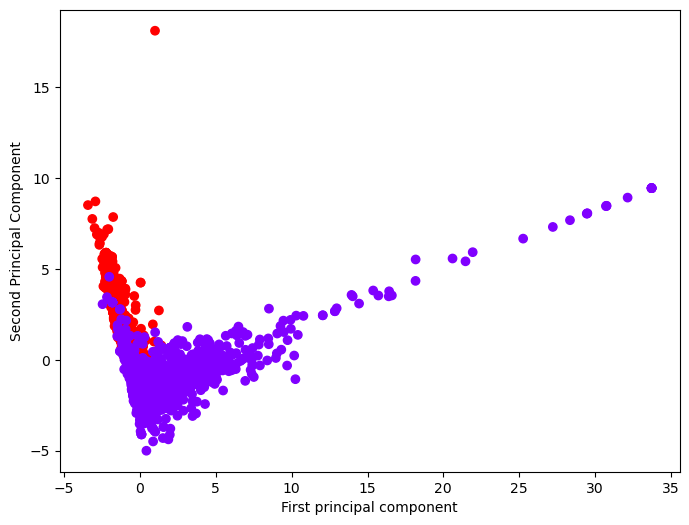

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c= df.is_spam, cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [21]:
pca.components_

array([[-4.85287792e-02, -9.76171227e-03, -5.35436672e-02,
        -7.68894501e-03, -4.38963257e-02, -5.32370375e-02,
        -5.58099394e-02, -4.04390907e-02, -5.39741805e-02,
        -2.57240875e-02, -5.86438513e-02, -2.29980527e-02,
        -4.19978888e-02, -2.00669534e-02, -3.85855781e-02,
        -4.99961795e-02, -5.40531548e-02, -2.69249983e-02,
        -9.12339845e-02, -3.69594544e-02, -8.78196196e-02,
        -1.64106748e-02, -6.43835194e-02, -4.67381332e-02,
         2.12709167e-01,  2.08573124e-01,  4.41024541e-02,
         2.73565495e-01,  2.15572439e-01,  2.97595173e-01,
         3.04157973e-01,  3.38936436e-01,  9.74963764e-03,
         3.38009409e-01,  2.63296516e-01,  3.09345427e-01,
         5.17251764e-02, -8.83642525e-04,  4.04272303e-02,
         3.09797149e-01,  1.23670129e-02,  2.82627545e-02,
         6.79155964e-02,  1.46643045e-02,  1.36241571e-02,
         2.64088650e-03,  4.16570205e-03,  6.50561450e-03,
         1.30092053e-04,  1.37859043e-01,  2.03501300e-0

This heatmap and the color bar represent the correlation between the various feature and the principal component itself :

<AxesSubplot:>

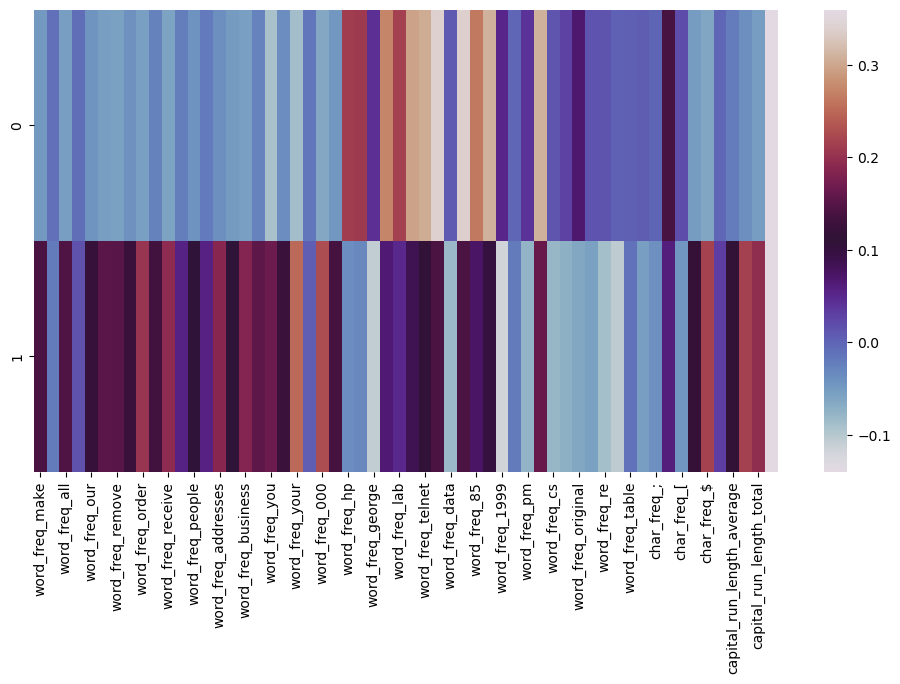

In [22]:
map= pd.DataFrame(pca.components_,columns=df.columns)
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')

In [23]:
# PCA with 10 composants
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
n_comp = len(df.columns)-1 
pca = PCA(n_components=n_comp)
# verify the colinearity of the variables
principalComponents = pca.fit_transform(X)
col = [str(i) for i in enumerate(range(1,n_comp+1))]
principalDf = pd.DataFrame(principalComponents, columns=col)

In [24]:
principalDf

,"(0, 1)","(1, 2)","(2, 3)","(3, 4)","(4, 5)","(5, 6)","(6, 7)","(7, 8)","(8, 9)","(9, 10)",...,"(47, 48)","(48, 49)","(49, 50)","(50, 51)","(51, 52)","(52, 53)","(53, 54)","(54, 55)","(55, 56)","(56, 57)"
0,742.631276,-73.999324,-0.568408,-0.667933,-1.748143,0.981958,-0.063637,0.328864,-0.236496,-0.127434,...,0.036770,0.022245,-0.120295,0.008771,0.016891,0.069156,0.019182,-0.005360,-0.003838,-0.000671
1,2019.853253,102.079108,-23.777270,0.343555,0.060852,-0.383178,-0.218754,-0.206208,0.213752,-0.452741,...,0.278286,-0.173801,0.045458,0.435027,-0.320140,0.293301,0.130138,-0.019675,0.002866,-0.000226
2,-93.049164,3.010617,-1.044087,-0.961077,-1.245016,0.444150,-0.043683,-0.114810,0.654887,0.090693,...,-0.023981,-0.000341,-0.151798,-0.024499,0.079771,0.206912,-0.005952,-0.013590,0.000238,-0.000117
3,-93.049165,3.010615,-1.044085,-0.961039,-1.244935,0.444064,-0.043673,-0.114786,0.654846,0.090758,...,-0.023719,-0.000194,-0.150936,-0.025695,0.079323,0.206771,-0.005834,-0.013590,0.000234,-0.000119
4,-232.292146,0.838058,-0.049819,-0.642626,0.824581,-1.784932,-0.124241,-0.562246,-0.023155,-0.084790,...,-0.052210,-0.082150,-0.035521,0.040564,0.004172,-0.037285,0.013129,-0.012601,0.000273,-0.000105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,-200.732441,-16.685587,-0.654998,-0.737118,0.446715,-1.292969,-0.161242,-0.553953,0.261182,-0.249339,...,-0.029891,0.017172,-0.017996,0.037906,-0.006468,-0.031312,0.004717,-0.005466,-0.007771,-0.000950
4596,-273.564749,-3.545636,-0.731022,-1.478107,-3.370491,2.443176,0.067467,0.190164,0.767156,0.064463,...,0.015109,0.007821,0.037183,0.017782,-0.017558,-0.061137,0.016359,-0.001447,-0.008287,-0.000354
4597,-170.644634,-18.627663,-0.510206,-0.853021,-0.169366,-0.701953,-0.127588,-0.449194,0.337222,-0.222031,...,-0.006836,-0.048009,-0.283404,0.297962,0.173810,-0.039763,-0.001787,-0.002804,-0.011159,0.000024
4598,-210.270076,-13.082386,-0.882688,-0.860292,-0.409944,-0.452783,-0.078183,-0.313662,0.487098,-0.009959,...,0.015401,-0.019053,0.054341,0.020943,-0.085432,-0.126497,0.001849,-0.006034,-0.006214,-0.003862


## Machine Learning models

#### Splitting then scaling data

Split data : Test/Train

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.40, random_state=10)

Most of this dataset is already scaled between 0 and 100 and uses the same "unit" as they all represent a frequency, but the following columns do not:
- `capital_run_length_average`
- `capital_run_length_longest`
- `capital_run_length_total`

We must scale them to make it easier for the models to compare the data. This will help increase the accuracy of our models.

In [26]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[-0.03836951, -0.09295085,  1.70403401, ..., -0.05790178,
        -0.0973939 ,  0.80875619],
       [-0.36838981, -0.16467806,  0.63586824, ..., -0.12590262,
        -0.15466754, -0.11187639],
       [-0.36838981, -0.16467806, -0.55098261, ..., -0.11077583,
        -0.19431851, -0.35484406],
       ...,
       [-0.36838981,  0.75980604, -0.55098261, ..., -0.12865612,
        -0.22075249, -0.4325276 ],
       [ 2.30844149, -0.16467806,  0.1611279 , ..., -0.04308868,
         0.00393636,  0.3244737 ],
       [-0.36838981, -0.16467806, -0.55098261, ..., -0.03402655,
         0.06121   , -0.27550768]])

### Logistic Regression model : GridSearch

In statistics, logistic regression or logit model is a binomial regression model. As with all binomial regression models, the aim is to explain a binary variable as well as possible by means of numerous real observations, using a mathematical model.

GridSearchCV is a technique for determining the best parameter values from a given set of parameters in a grid. It is simply a cross-validation approach. The model as well as the parameters must be entered. Predictions are generated once the best parameter values have been extracted.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve

In [28]:
def plot_accuracy_curve(param_range, train_score, test_score):
  plt.plot(param_range, np.mean(train_score, axis=1), label="training accuracy")
  plt.plot(param_range, np.mean(test_score, axis=1), label="test accuracy")
  plt.xscale('log')
  plt.legend()
  plt.show()

In [29]:
grid_logreg = { "C":np.logspace(-5,5,11), "penalty": ["l1","l2", "elasticnet"], "dual": [True, False] }
model_logreg = LogisticRegression()
model_logreg_cv = GridSearchCV(model_logreg, grid_logreg, cv=10) #Cross validation : cv = 10 times
model_logreg_cv.fit(X_train, Y_train)
model_logreg_cv_pred = model_logreg_cv.predict(X_test)

model_logreg_cv.score(X_test, Y_test)

0.9255434782608696

One parameter for assessing classification models is accuracy, it is the percentage of predictions that our model correctly predicted. The following is the official definition of accuracy: The number of accurate predictions divided by the total number of predictions.

In [30]:
from sklearn.metrics import accuracy_score
accur['logistic regression with gridsearch'] = [accuracy_score(Y_test, model_logreg_cv_pred)]
print ("Accuracy : ", accuracy_score(Y_test, model_logreg_cv_pred))

Accuracy :  0.9255434782608696


In [31]:
accuracy_score(Y_test, model_logreg_cv_pred)

0.9255434782608696

#### Validation Curve

Using a validation curve on the `C` parameter, we can notice that we get a better model when `C > ~10^-2` :

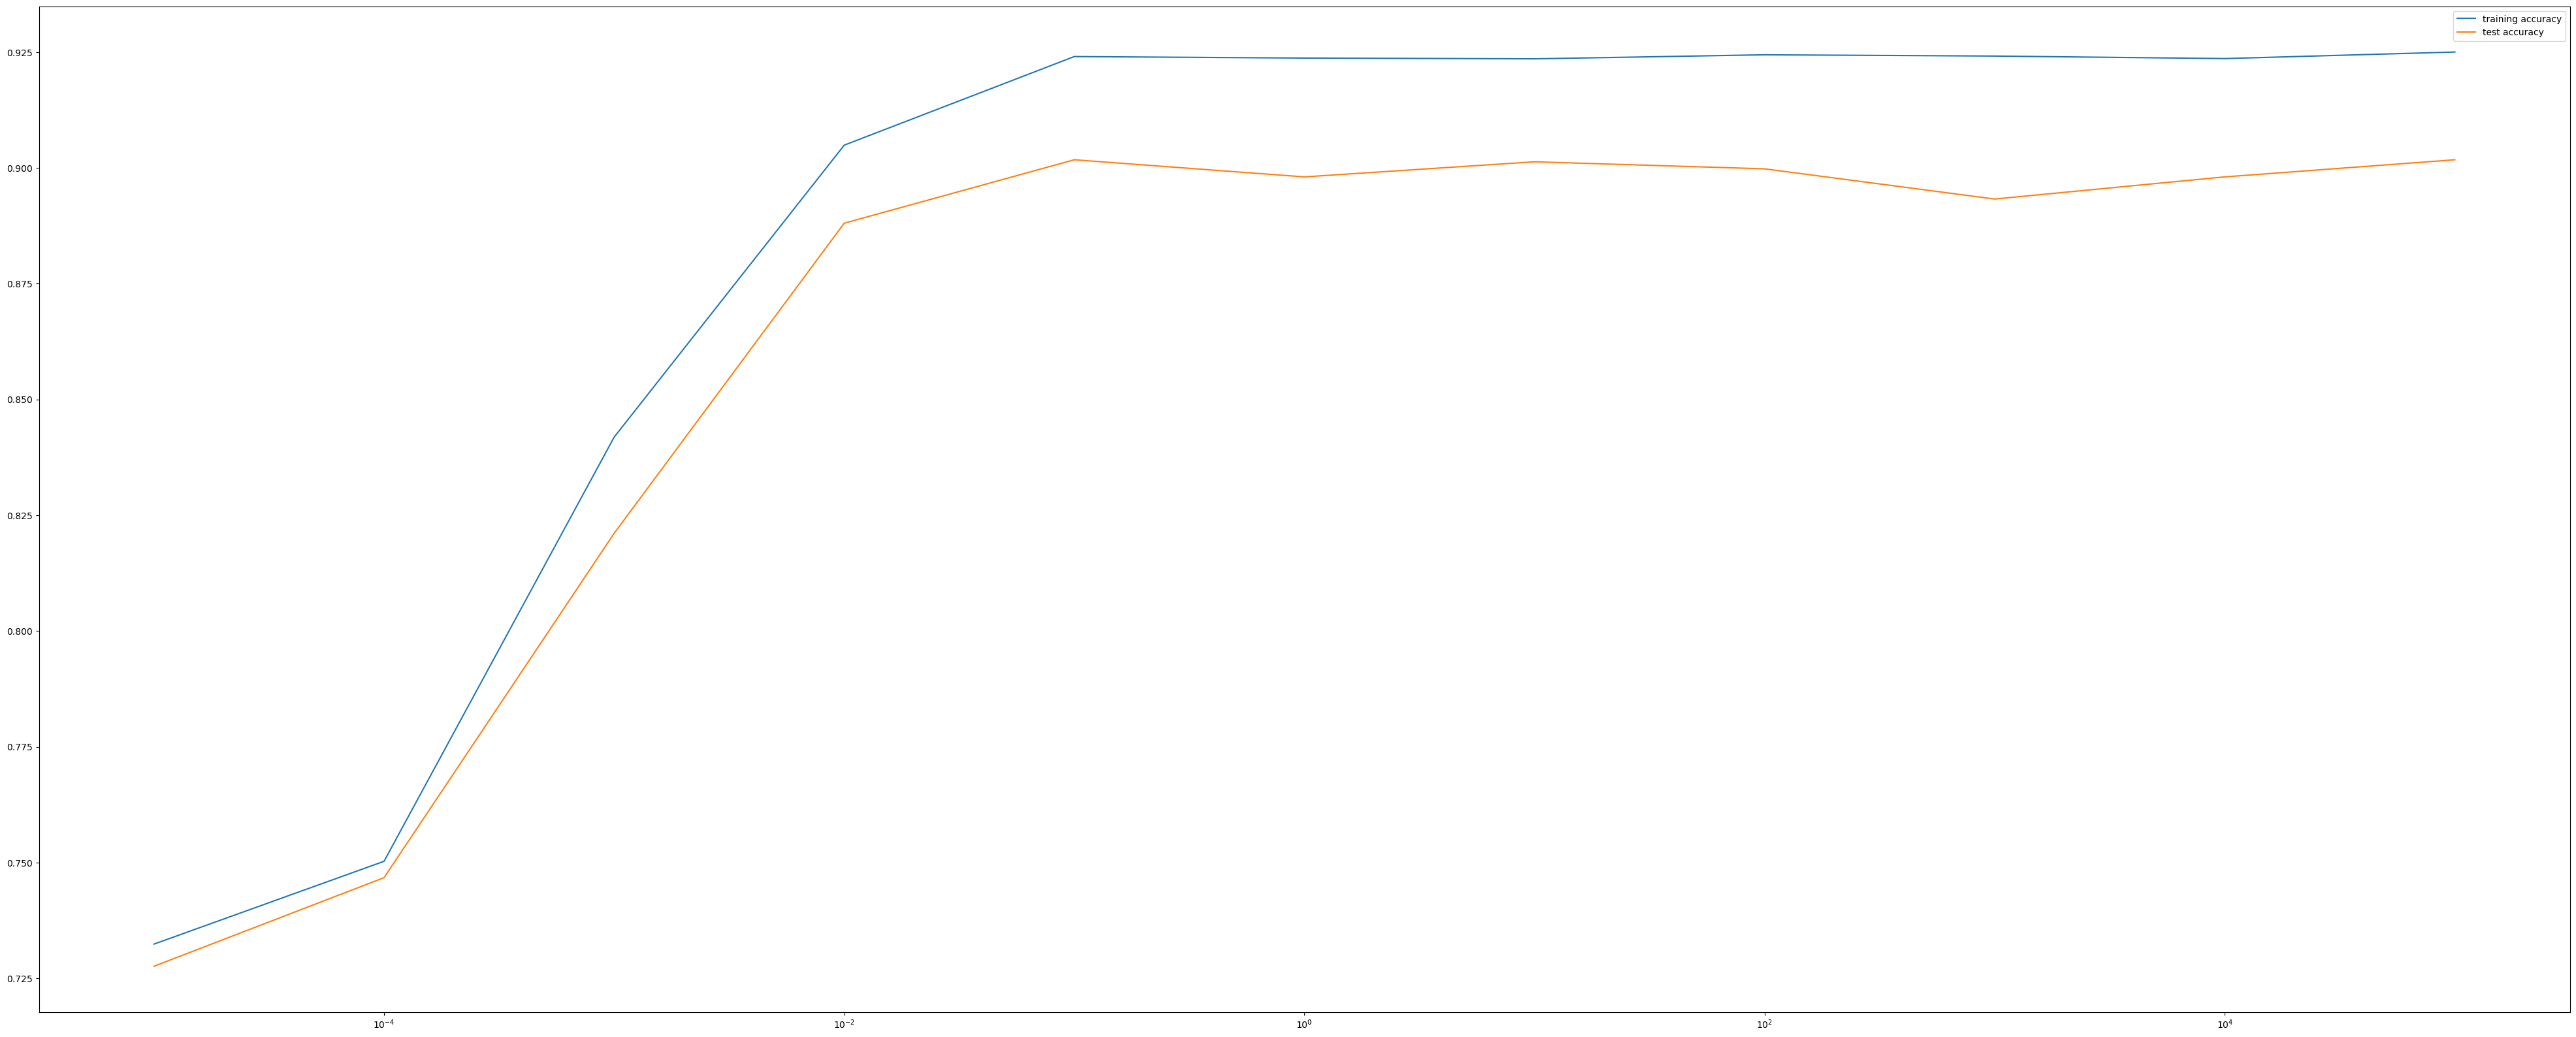

In [32]:
param_range = np.logspace(-5,5,11)
train_score,test_score = validation_curve(LogisticRegression(penalty=model_logreg_cv.best_params_["penalty"],dual=model_logreg_cv.best_params_["dual"],), X, y, param_name="C", param_range=param_range, cv=5)
plot_accuracy_curve(param_range, train_score, test_score)

#### Confusion Matrix

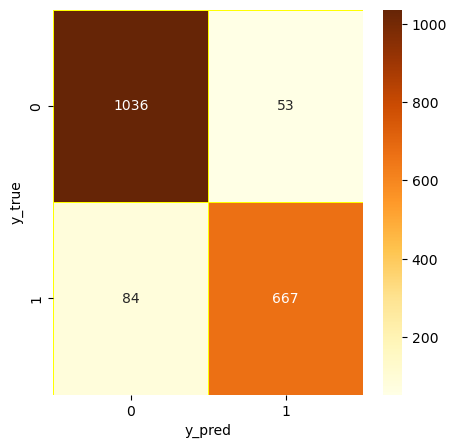

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

model_logreg_grid_cm = confusion_matrix(Y_test, model_logreg_cv_pred)
  
f, ax = plt.subplots(figsize = (5,5))

sns.heatmap(model_logreg_grid_cm, annot = True, linewidths = 0.5, linecolor = "yellow", fmt = ".0f", ax = ax, cmap = "YlOrBr")
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### Logistic Regression Model: Recursive feature elimination

RFE is a feature selection approach that fits a model and eliminates the weakest feature (or features) until the desired amount of features is attained. After playing a bit with the `n_features_to_select` param, we noticed that when we set it to 40, we get better results. This shows that only a small portion of the features are relevant to our model.

In [34]:
from sklearn.feature_selection import RFE

model_logreg = LogisticRegression()
model_logreg_rfe = RFE(model_logreg, step=1, n_features_to_select=40)
model_logreg_rfe = model_logreg_rfe.fit(X_train, Y_train)

model_logreg_rfe_y_pred = model_logreg_rfe.predict(X_test)

#### Confusion Matrix
The number of accurate and inaccurate predictions is counted and separated by each class. 
It provides you with information on both the errors your classifier is making and, more crucially, the kinds of errors that are being produced.

The drawback of relying solely on classification accuracy is mitigated by this breakdown.

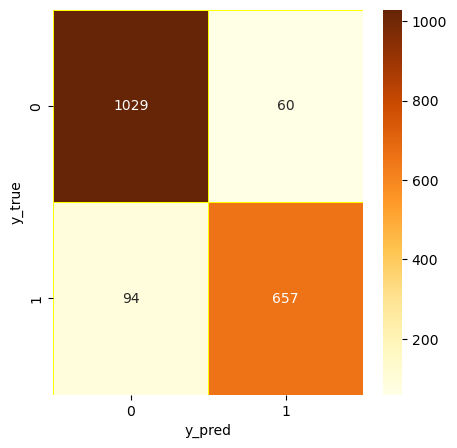

In [35]:
model_logreg_rfe_cm = confusion_matrix(Y_test, model_logreg_rfe_y_pred)
  
f, ax = plt.subplots(figsize = (5,5))

sns.heatmap(model_logreg_rfe_cm, annot = True, linewidths = 0.5, linecolor = "yellow", fmt = ".0f", ax = ax, cmap = "YlOrBr")
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

This model doesn't perform as well as the last one, it classifies as spam way more emails that aren't and also classifies more emails as spam when they aren't.

In [36]:
accur['Logistic Regression RFE'] =  [accuracy_score(Y_test, model_logreg_rfe_y_pred)]
print ("Accuracy : ", accuracy_score(Y_test, model_logreg_rfe_y_pred))

Accuracy :  0.9163043478260869


### K-Nearest Neighbor

The K-Nearest Neighbor or the KNN algorithm is a machine learning algorithm that works by assuming that similar things exist close to each other. Hence, the K-NN algorithm uses feature similarity between the new data points and the points in the training set (available cases) to predict the values of the new data points. In essence, the K-NN algorithm assigns a value to the latest data point based on how closely it resembles the points in the training set.

In [37]:
from sklearn import neighbors
from sklearn.model_selection import cross_val_score

model_knnreg = neighbors.KNeighborsRegressor(n_neighbors=6)
model_knnreg.fit(X_train, Y_train)

model_knnreg_y_pred = model_knnreg.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(Y_test, model_knnreg_y_pred)
mse = mean_squared_error(Y_test, model_knnreg_y_pred)
rmse = mean_squared_error(Y_test, model_knnreg_y_pred, squared=False)
score = cross_val_score(model_knnreg, X_train, Y_train).mean()


print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')
print(f'score: {score}')

mae: 0.1428442028985507
mse: 0.07558876811594203
rmse: 0.2749341159549721
score: 0.6649502640849178


#### Confusion Matrix

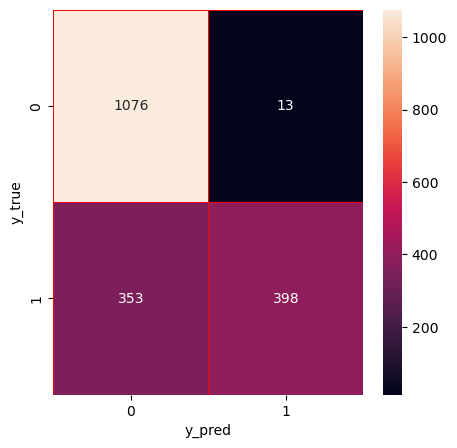

In [38]:
cm = confusion_matrix(Y_test.astype(int), model_knnreg_y_pred.astype(int))

import seaborn as sns 
f, ax = plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

This model allows way more spam than the others but it also blocks way less legitimate emails, which could be better, as you don't want to miss an important email. We've also noticed that the more you increase `n_neighbors` the more it allows spam but it also reduced the number of emails considered as spam when they are not.

In [39]:
from sklearn.metrics import accuracy_score
accur['KNN'] = [accuracy_score(Y_test.astype(int), model_knnreg_y_pred.astype(int))]
print("Accuracy : ", accuracy_score(Y_test.astype(int), model_knnreg_y_pred.astype(int)))

Accuracy :  0.8010869565217391


In [40]:
# Accuracy = TP+TN / (TP+TN+FP+FN)

(cm[1][1] + cm[0][0]) / (cm[1][1] + cm[0][0] + cm[0][1] + cm[1][0])

0.8010869565217391

We can notice here that the KNN is not a good fit for our dataset.

###  Decision Tree

The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 

We can play with `max_depth` and `min_samples_split` to improve our model.
- `max_depth` is the maximum depth of the tree
- `min_samples_split` is the minimum number of samples required to be at a leaf node

In [42]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_split=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

In [43]:
accur['decision tree'] = [metrics.accuracy_score(Y_test, Y_pred)]
print("Accuracy:",  metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9173913043478261


#### Confusion Matrix

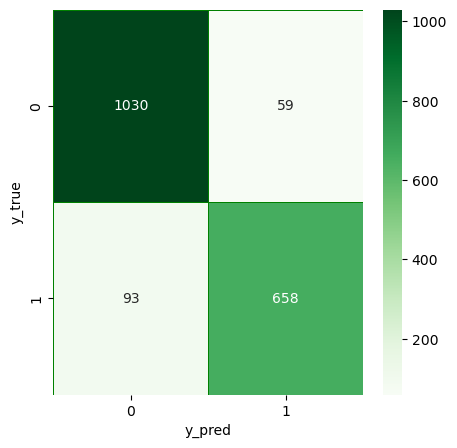

In [44]:
cm = confusion_matrix(Y_test.astype(int), Y_pred.astype(int))

import seaborn as sns 
f, ax = plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="Green", fmt=".0f", ax=ax, cmap="Greens")
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### Gradient boosting classification

Gradient boosting is a machine learning technique that produces a prediction model in the form of an ensemble of weak prediction models. 

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, Y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, Y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, Y_test)))
    print("\n")

Learning rate:  0.05
Accuracy score (training): 0.816
Accuracy score (validation): 0.808


Learning rate:  0.075
Accuracy score (training): 0.845
Accuracy score (validation): 0.846


Learning rate:  0.1
Accuracy score (training): 0.864
Accuracy score (validation): 0.860


Learning rate:  0.25
Accuracy score (training): 0.906
Accuracy score (validation): 0.898


Learning rate:  0.5
Accuracy score (training): 0.921
Accuracy score (validation): 0.907


Learning rate:  0.75
Accuracy score (training): 0.929
Accuracy score (validation): 0.920


Learning rate:  1
Accuracy score (training): 0.926
Accuracy score (validation): 0.917




In [48]:
accur['gradient boosting'] = 0.917

In [49]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, Y_train)
predictions = gb_clf2.predict(X_test)

cm = confusion_matrix(Y_test, predictions)

print("Confusion Matrix:")
print(confusion_matrix(Y_test, predictions))

print("\n")

print("Classification Report")
print(classification_report(Y_test, predictions))

Confusion Matrix:
[[1035   54]
 [ 117  634]]


Classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92      1089
         1.0       0.92      0.84      0.88       751

    accuracy                           0.91      1840
   macro avg       0.91      0.90      0.90      1840
weighted avg       0.91      0.91      0.91      1840



#### Confusion Matrix

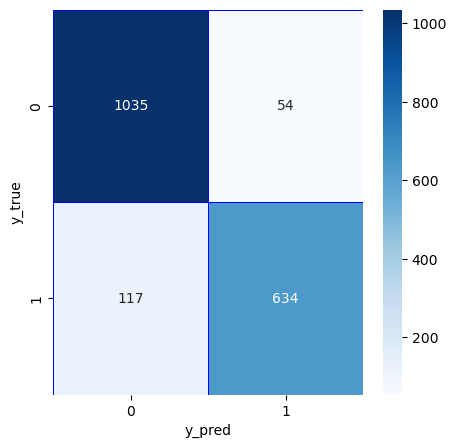

In [50]:
import seaborn as sns 
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="blue", fmt=".0f", ax=ax, cmap="Blues")
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### Random forest

On various samples, it constructs decision trees and uses their average for classification and majority vote for regression.

The Random Forest Algorithm's ability to handle data sets with both continuous variables, as in regression, and categorical variables, as in classification, is one of its most crucial qualities. In terms of categorization issues, it delivers superior outcomes.

In [51]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=70, random_state=0)
clf.fit(X_train, Y_train)

rf_Y_pred = clf.predict(X_test)

In [52]:
accur['random forest'] = [metrics.accuracy_score(Y_test, rf_Y_pred)]
print("Accuracy:",  metrics.accuracy_score(Y_test, rf_Y_pred))

Accuracy: 0.9521739130434783


#### Confusion Matrix

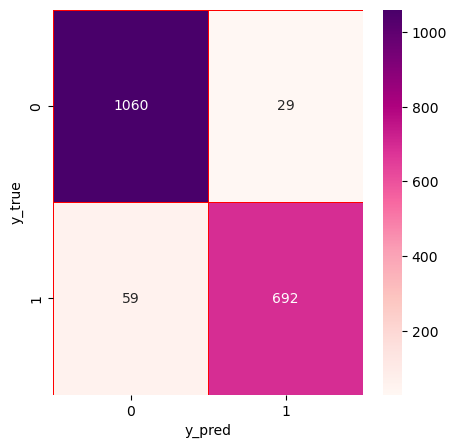

In [53]:
cm = confusion_matrix(Y_test.astype(int), rf_Y_pred.astype(int))

import seaborn as sns 
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="Red", fmt=".0f", ax=ax, cmap="RdPu")
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### XGBoost

XGBoost is an open-source software library that implements optimized distributed gradient boosting machine learning algorithms under the Gradient Boosting framework.


In [54]:
from xgboost import XGBClassifier

In [55]:
xgb_clf = XGBClassifier(max_depth=5)
xgb_clf.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [56]:
prediction = xgb_clf.predict(X_test)
predictions = [round(value) for value in prediction]
cm = confusion_matrix(Y_test, prediction)

In [57]:
score = xgb_clf.score(X_test, Y_test)
accur['XGBoost'] = score
print(score)

0.95


Let's take a look at the features that influence the most our model.

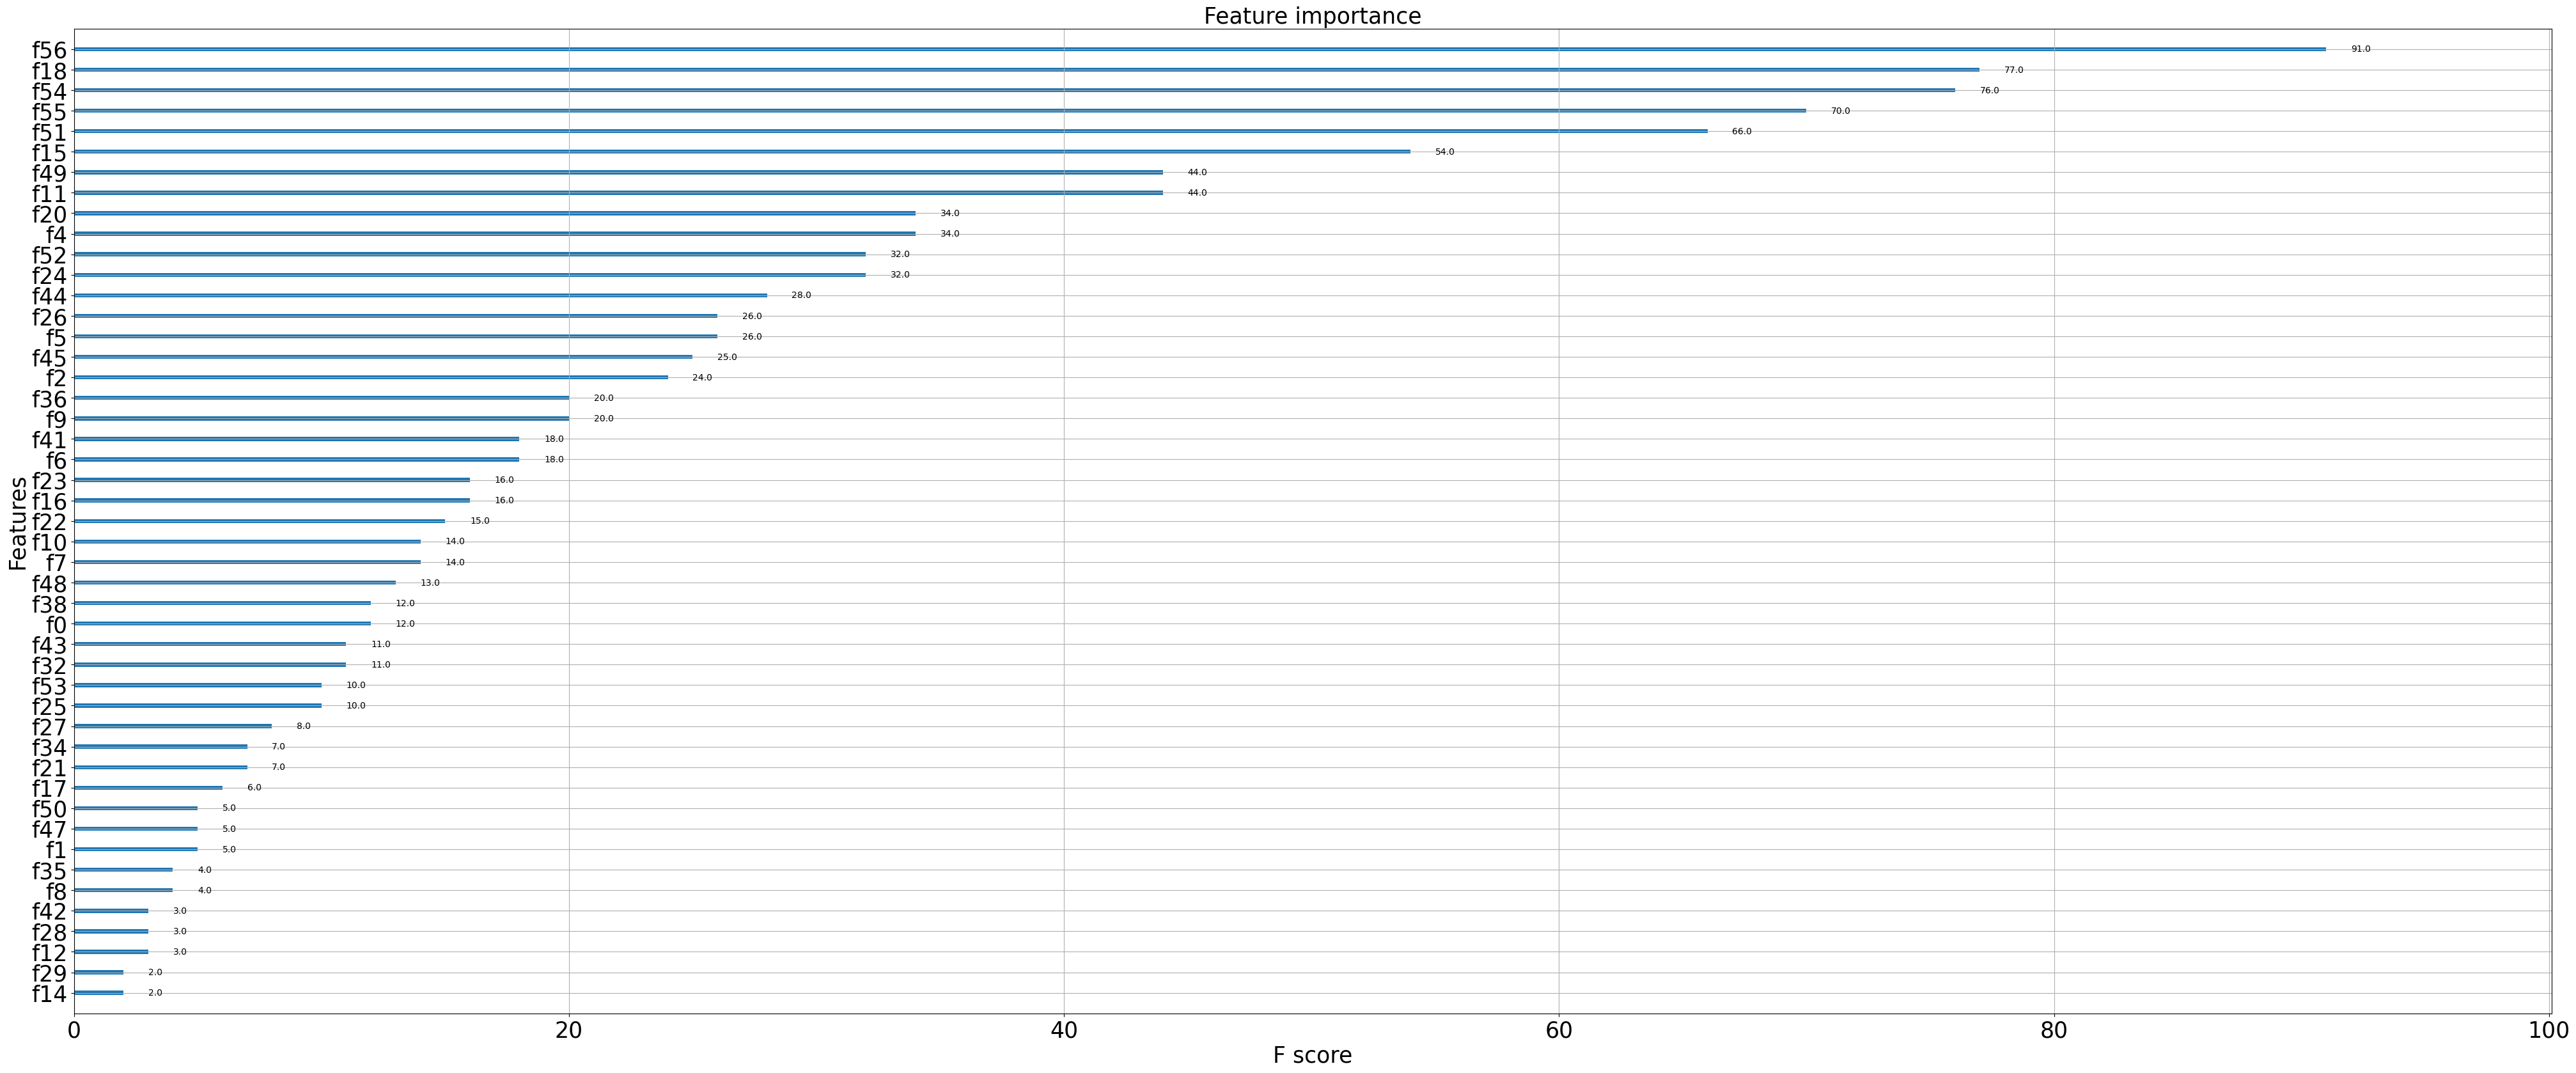

In [58]:
from xgboost import plot_importance
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 25
mpl.rcParams['axes.labelsize'] = 25
mpl.rcParams['xtick.labelsize'] = 25
mpl.rcParams['ytick.labelsize'] = 25
plot_importance(xgb_clf, max_num_features=50)
plt.show()

In [59]:
# Visualize the importance of each feature
xgb_clf.feature_importances_

array([0.00755331, 0.00625205, 0.00438394, 0.        , 0.02031251,
       0.00614988, 0.1827717 , 0.01149035, 0.0045919 , 0.00591509,
       0.00686726, 0.00418161, 0.00481797, 0.        , 0.0026414 ,
       0.01877958, 0.01792732, 0.02069015, 0.00570909, 0.        ,
       0.0231771 , 0.00274799, 0.01917452, 0.03390837, 0.05117388,
       0.01115473, 0.0409793 , 0.02352058, 0.00529984, 0.00154563,
       0.        , 0.        , 0.00347835, 0.        , 0.00561075,
       0.01769987, 0.01670397, 0.        , 0.00751406, 0.        ,
       0.        , 0.02169158, 0.00251362, 0.00584706, 0.01456681,
       0.03231739, 0.        , 0.00730147, 0.01285248, 0.00792135,
       0.00296688, 0.078038  , 0.17072113, 0.00305829, 0.02337275,
       0.0119581 , 0.010149  ], dtype=float32)

In [60]:
# impfea : IMPortant FEAture.
# Which features are the most important ?


yoo = list(xgb_clf.feature_importances_)
yoo.sort(reverse=True)

impfea = []
for i in [i for i in yoo if i > 0]:
    impfea.append(list(xgb_clf.feature_importances_).index(i))

impfea = list(df.columns[impfea])
impfea

['word_freq_remove',
 'char_freq_$',
 'char_freq_!',
 'word_freq_hp',
 'word_freq_george',
 'word_freq_money',
 'word_freq_edu',
 'word_freq_650',
 'capital_run_length_average',
 'word_freq_your',
 'word_freq_meeting',
 'word_freq_email',
 'word_freq_our',
 'word_freq_000',
 'word_freq_free',
 'word_freq_business',
 'word_freq_technology',
 'word_freq_1999',
 'word_freq_re',
 'char_freq_;',
 'capital_run_length_longest',
 'word_freq_internet',
 'word_freq_hpl',
 'capital_run_length_total',
 'char_freq_(',
 'word_freq_make',
 'word_freq_pm',
 'word_freq_conference',
 'word_freq_receive',
 'word_freq_address',
 'word_freq_over',
 'word_freq_mail',
 'word_freq_project',
 'word_freq_you',
 'word_freq_85',
 'word_freq_lab',
 'word_freq_people',
 'word_freq_order',
 'word_freq_all',
 'word_freq_will',
 'word_freq_data',
 'char_freq_#',
 'char_freq_[',
 'word_freq_font',
 'word_freq_addresses',
 'word_freq_original',
 'word_freq_labs']

In [61]:
impfea[0:3]

['word_freq_remove', 'char_freq_$', 'char_freq_!']

This shows us the most important features in the dataset, we see here that these are the variables representing the frequency of '$', 'remove' and '!

In [62]:
mse = mean_squared_error(prediction, Y_test)
mse

0.05

#### Confusion Matrix

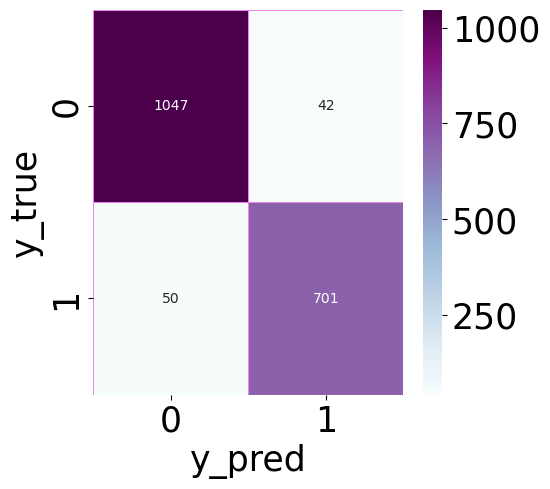

In [63]:
import seaborn as sns 
f, ax = plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="violet", fmt=".0f", ax=ax, cmap="BuPu")
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

This is the best model, we have a very low false positive and false negative with an accuracy of ~95%.

We are now taking the columns that had a main impact on our xgboost model and use them in a boxplot to try to  understand the impact they had on our model

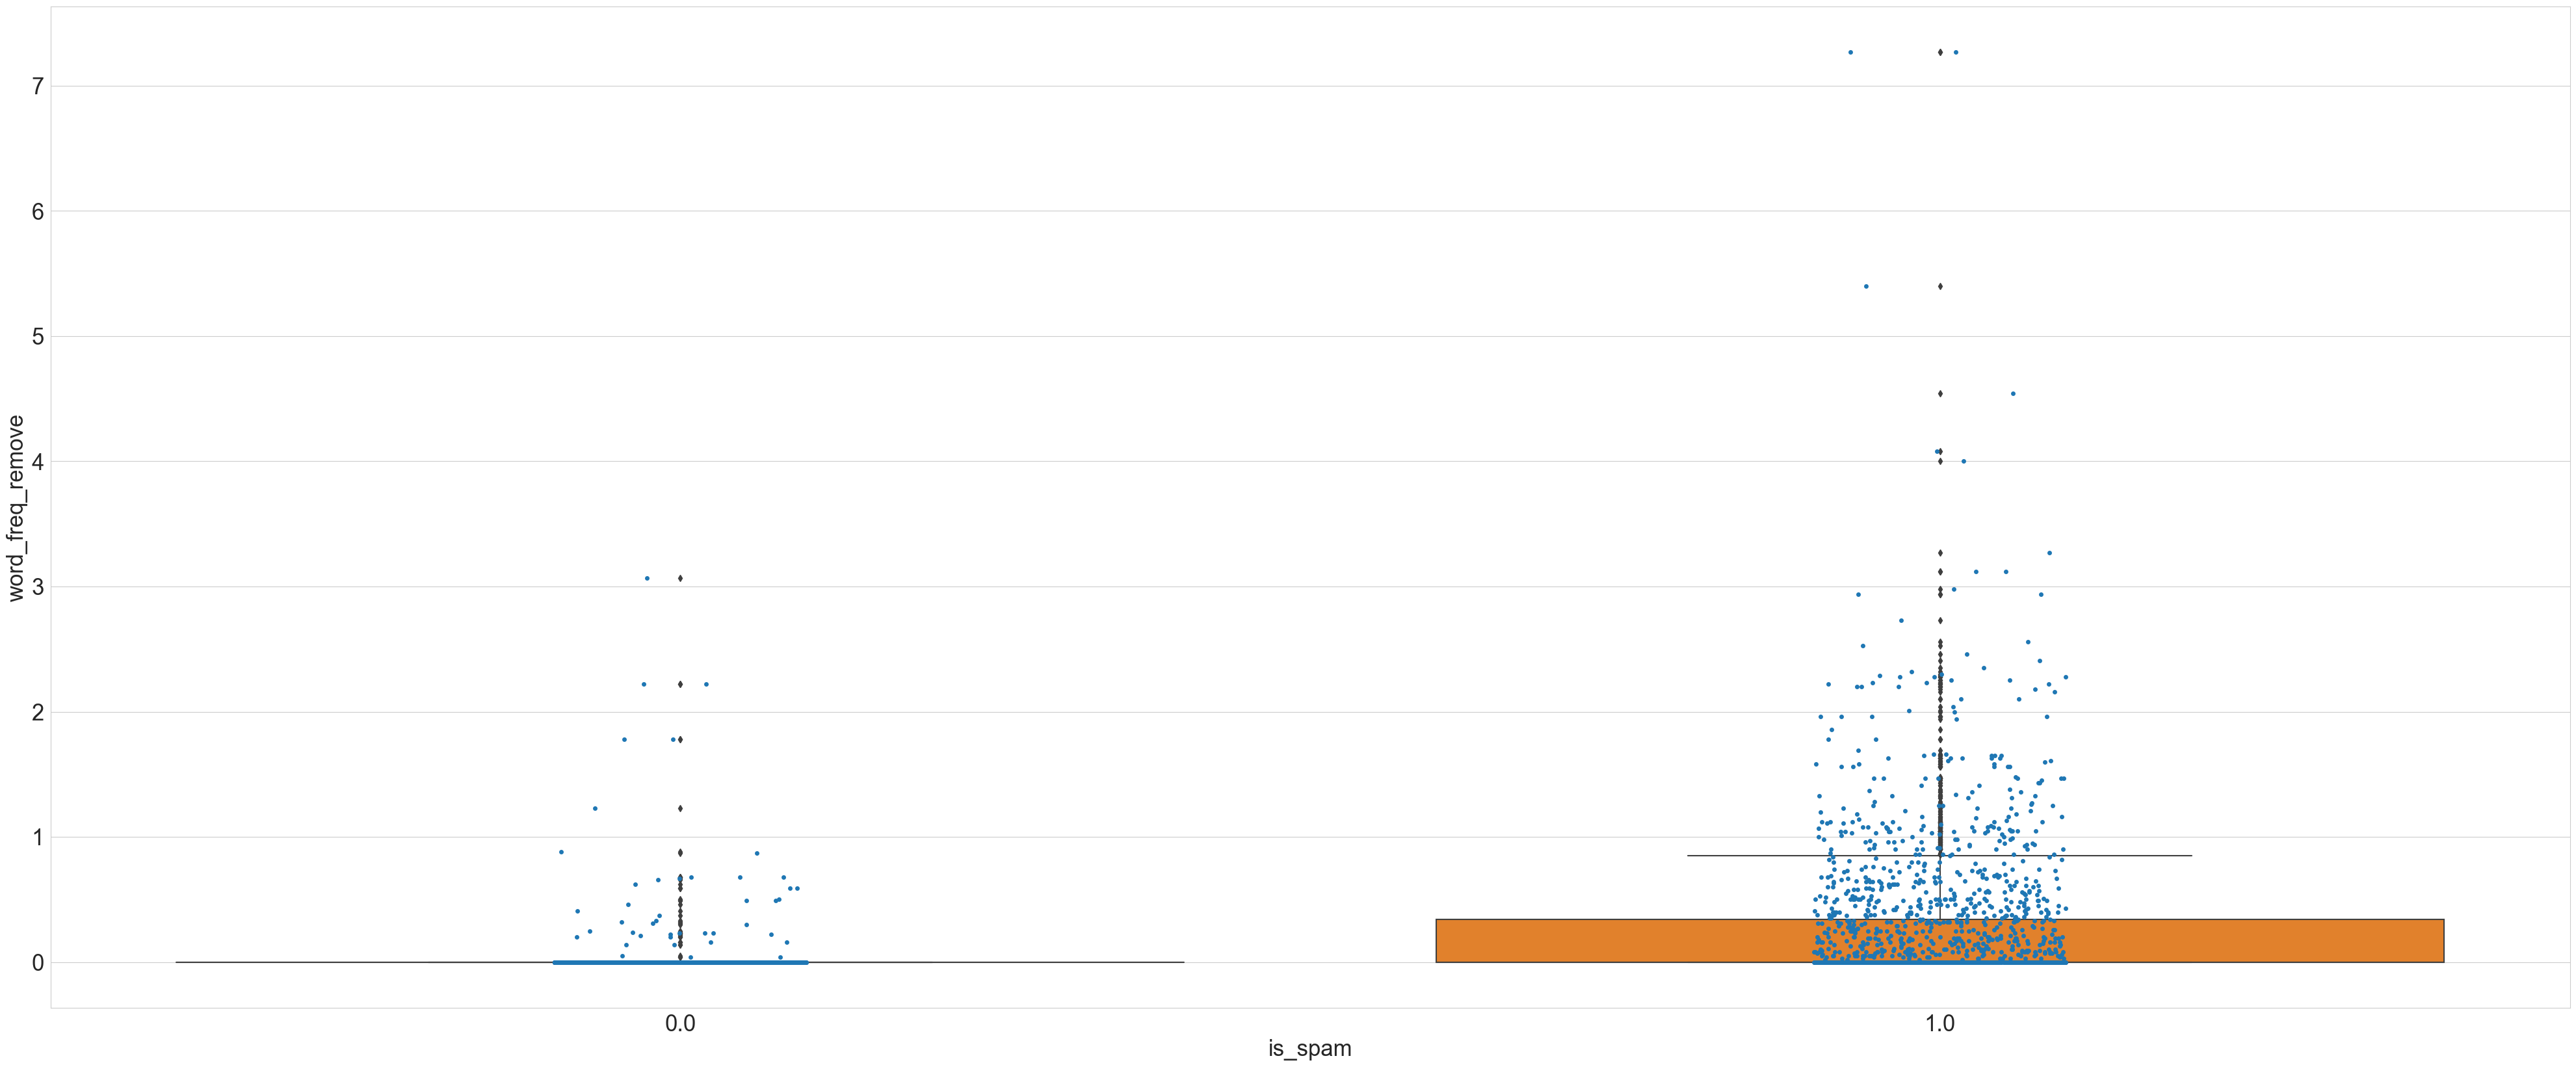

In [64]:
import seaborn as sns
sns.set_style('whitegrid')
ax= sns.boxplot(x='is_spam',y=impfea[0],data=df)
ax = sns.stripplot(x="is_spam", y=impfea[0],data=df)

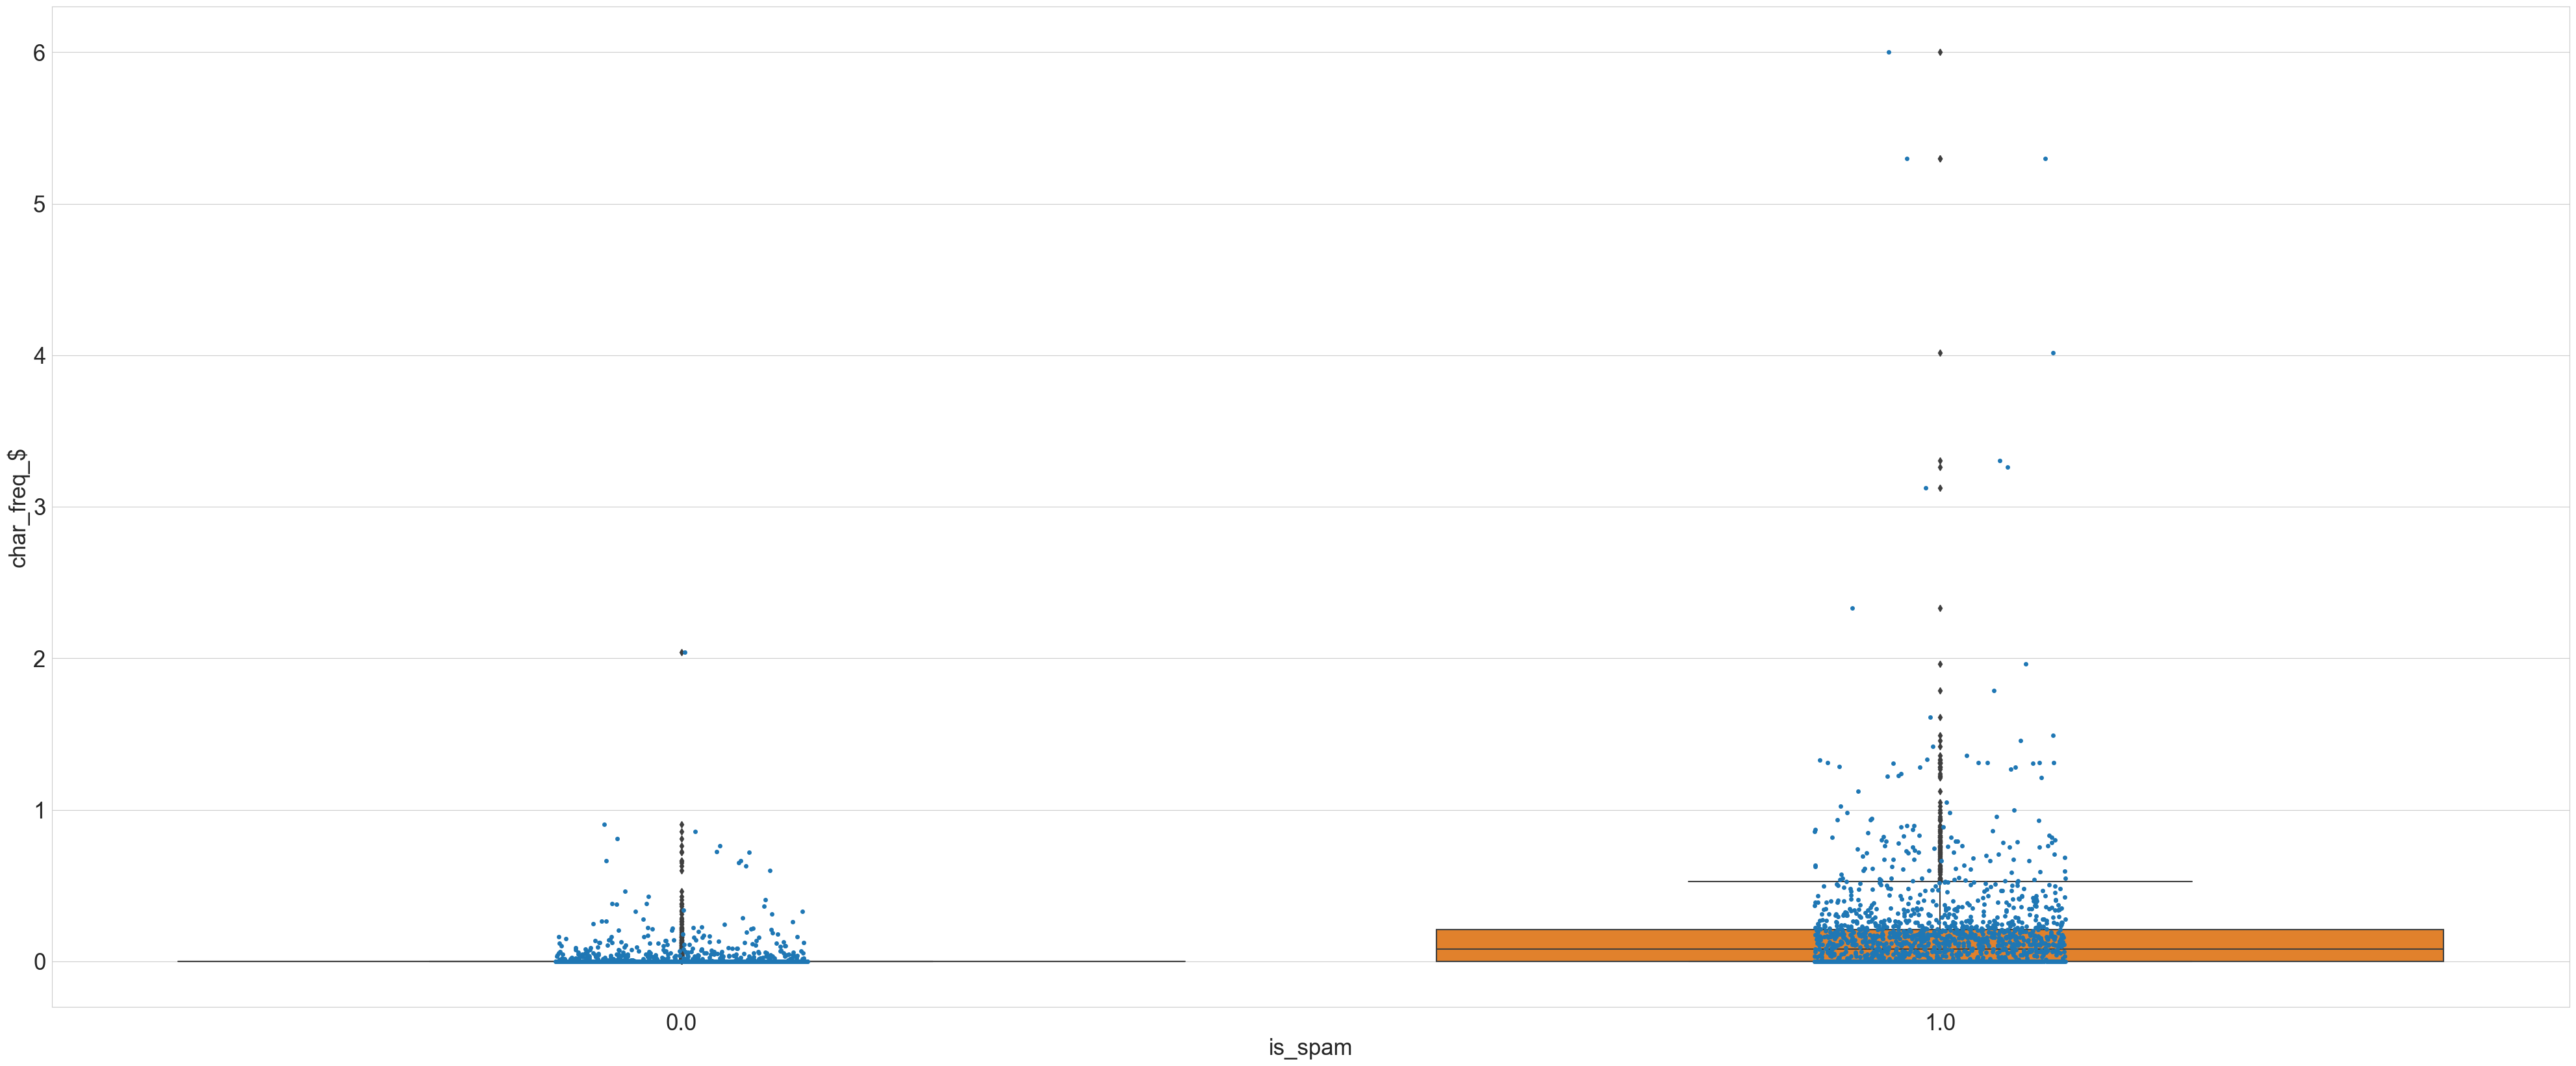

In [65]:
import seaborn as sns
sns.set_style('whitegrid')
ax= sns.boxplot(x='is_spam',y=impfea[1],data=df)
ax = sns.stripplot(x="is_spam", y=impfea[1],data=df)

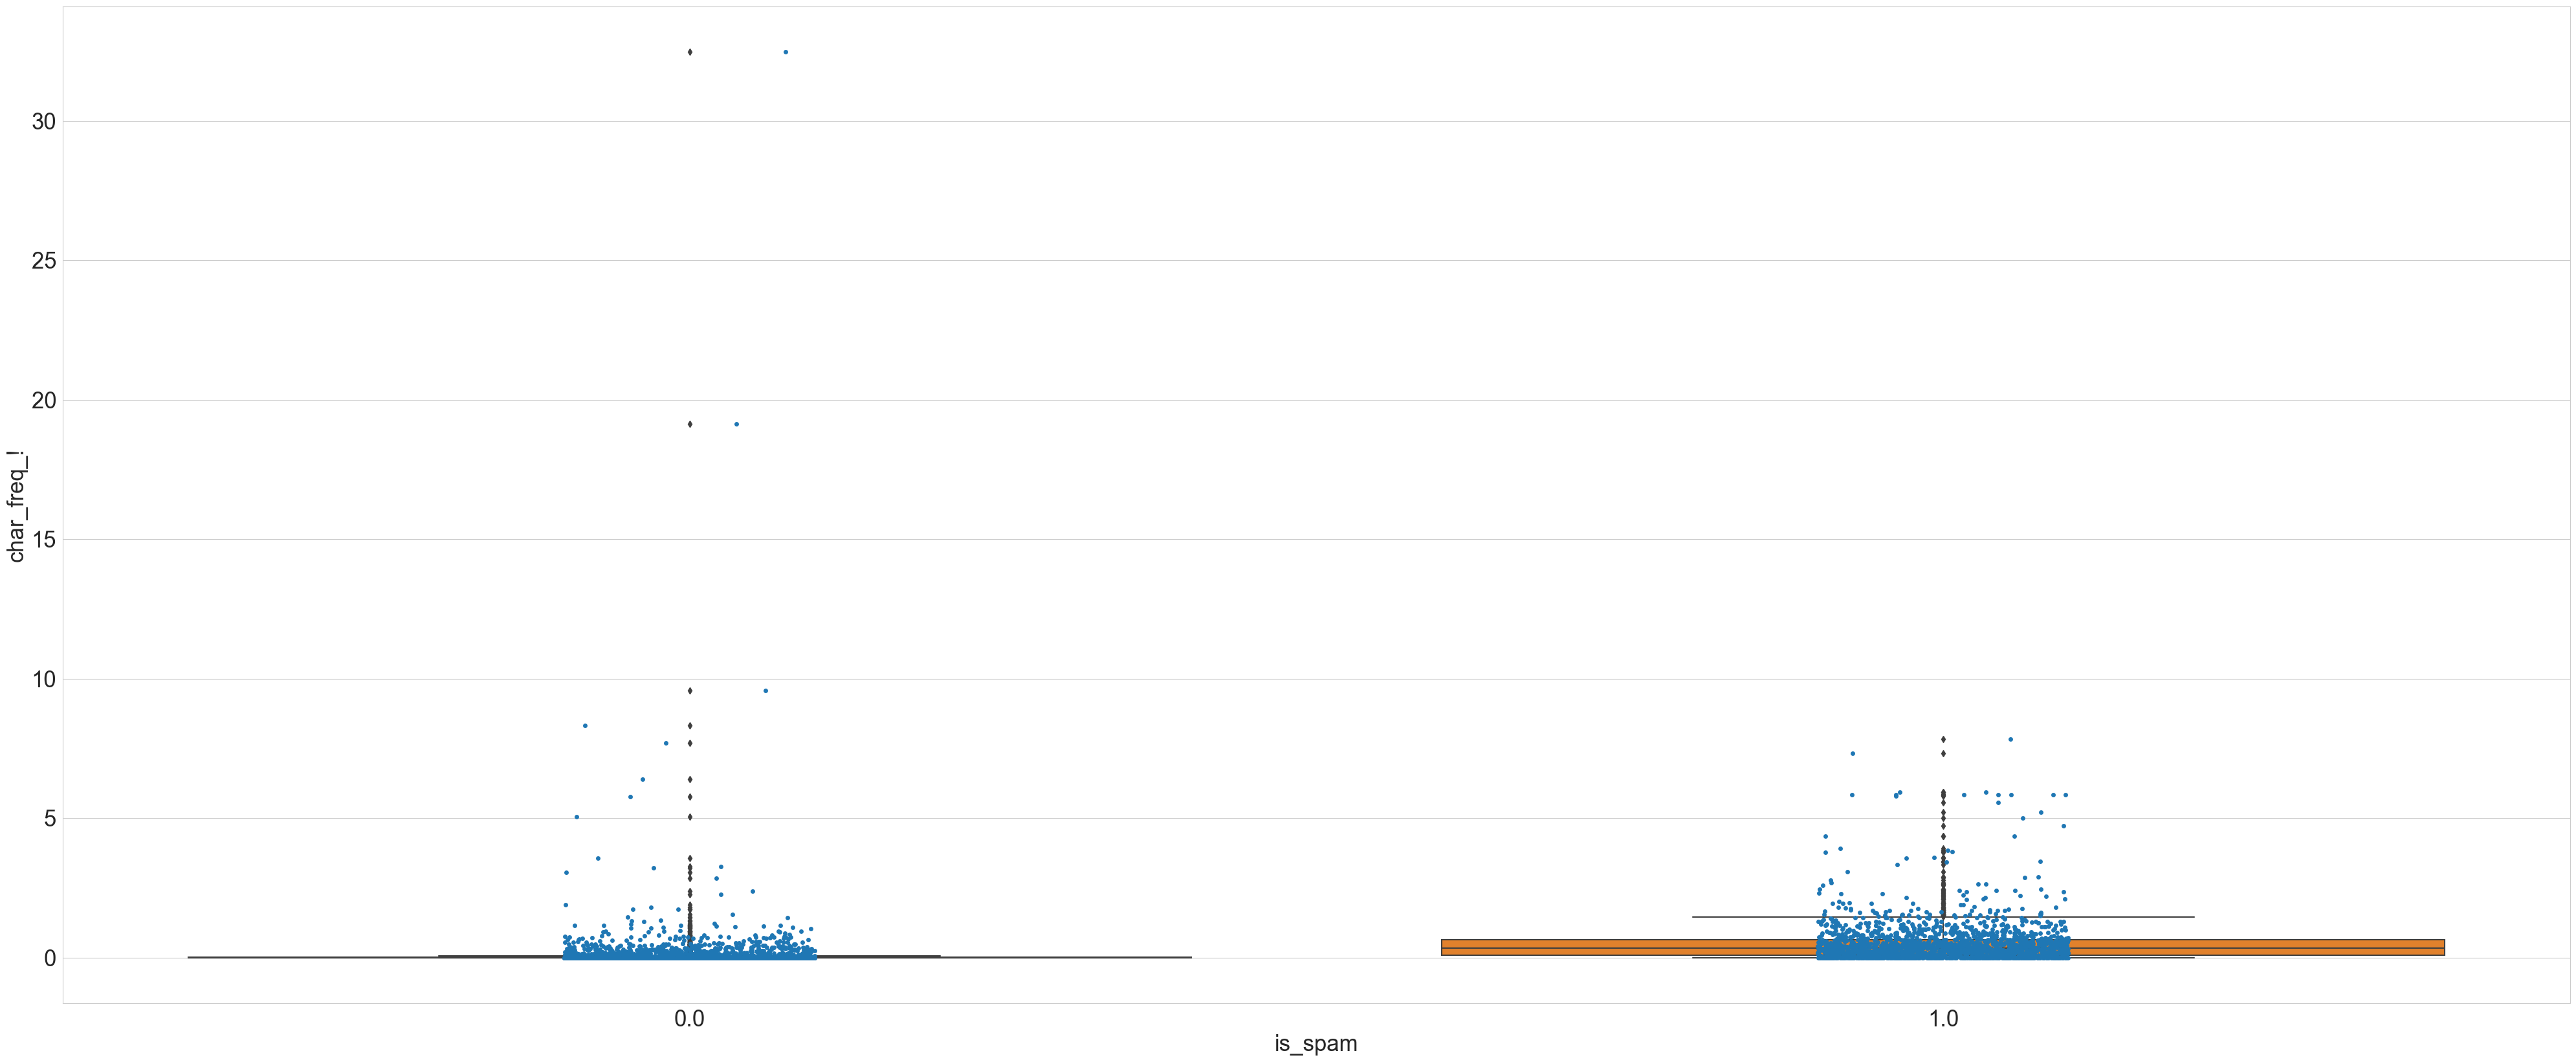

In [66]:
import seaborn as sns
sns.set_style('whitegrid')
ax= sns.boxplot(x='is_spam',y=impfea[2],data=df)
ax = sns.stripplot(x="is_spam", y=impfea[2],data=df)

The common point between the three boxplots is the fact that each variable has at least one or more values that is much higher than the other ones. 

# IN CONCLUSION

## KEY FEATURES ?

In [67]:
print( '3 most used characters in this spam : ', impfea[0:3])

3 most used characters in this spam :  ['word_freq_remove', 'char_freq_$', 'char_freq_!']


Recurrent features, here being :


‘Remove’ : This may be linked to various spams for virus scanning apps / virus removal scams


‘$’ : This may be linked to the fraudulent activities perpetrated by hackers, spread by spam


‘!’ : This may symbolize excitement, and diplay an use of urgency in marketing

In [68]:
accur = accur.max()
accur.sort_values(ascending  = False)

random forest                          0.952174
XGBoost                                0.950000
logistic regression with gridsearch    0.925543
decision tree                          0.917391
gradient boosting                      0.917000
Logistic Regression RFE                0.916304
KNN                                    0.801087
dtype: float64

We can see that the best model is the Random Forest model, however the difference stays within the error margin: We may chose to prefer XGBoost, as it is more adaptable. Also, the trees are made little by little with transparency, the calculation is faster and the precision is usually more accurate than Random Forest. The worst model for our data here seems to be KNN.